<a href="https://colab.research.google.com/github/Hetvi48/AeroCare/blob/main/Outlier_third_notebook_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pre-Processing

In [ ]:
import numpy as np
import pandas as pd

from IPython.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

# configure plotly graph objects
pio.renderers.default = 'iframe'
# pio.renderers.default = 'vscode'

pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis,
#     layout_hovermode = 'closest',
#     layout_hoverdistance = -1,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
#     plot_bgcolor="white",
)

# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'
# pio.templates.default = 'seaborn+gridon'
# pio.templates

In [ ]:
index_names = ['engine', 'cycle']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
col_names = index_names + setting_names + sensor_names

In [ ]:
df_train = pd.read_csv('drive/MyDrive/archive/CMaps/train_FD003.txt',sep=r'\s+',header=None,index_col=False,names=col_names)
df_test = pd.read_csv('drive/MyDrive/archive/CMaps/test_FD003.txt',sep=r'\s+',header=None,index_col=False,names=col_names)
df_test_RUL = pd.read_csv('drive/MyDrive/archive/CMaps/RUL_FD003.txt',sep=r'\s+',header=None,index_col=False,names=['RUL'])

In [ ]:
df_train.head()


engine  cycle  setting_1  setting_2  setting_3  (Fan inlet temperature) (◦R)  (LPC outlet temperature) (◦R)  (HPC outlet temperature) (◦R)  (LPT outlet temperature) (◦R)  (Fan inlet Pressure) (psia)  (bypass-duct pressure) (psia)  (HPC outlet pressure) (psia)  (Physical fan speed) (rpm)  (Physical core speed) (rpm)  (Engine pressure ratio(P50/P2)  (HPC outlet Static pressure) (psia)  (Ratio of fuel flow to Ps30) (pps/psia)  (Corrected fan speed) (rpm)  (Corrected core speed) (rpm)  (Bypass Ratio)   (Burner fuel-air ratio)  (Bleed Enthalpy)  (Required fan speed)  (Required fan conversion speed)  (High-pressure turbines Cool air flow)  (Low-pressure turbines Cool air flow)
0       1      1    -0.0005     0.0004      100.0                        518.67                         642.36                        1583.23                        1396.84                        14.62                          21.61                        553.97                     2387.96                      9062.17                             1.3                                47.30                                   522.31                      2388.01                       8145.32           8.4246                     0.03               391                  2388                            100.0                                   39.11                                23.3537
1       1      2     0.0008    -0.0003      100.0                        518.67                         642.50                        1584.69                        1396.89                        14.62                          21.61                        554.55                     2388.00                      9061.78                             1.3                                47.23                                   522.42                      2388.03                       8152.85           8.4403                     0.03               392                  2388                            100.0                                   38.99                                23.4491
2       1      3    -0.0014    -0.0002      100.0                        518.67                         642.18                        1582.35                        1405.61                        14.62                          21.61                        554.43                     2388.03                      9070.23                             1.3                                47.22                                   522.03                      2388.00                       8150.17           8.3901                     0.03               391                  2388                            100.0                                   38.85                                23.3669
3       1      4    -0.0020     0.0001      100.0                        518.67                         642.92                        1585.61                        1392.27                        14.62                          21.61                        555.21                     2388.00                      9064.57                             1.3                                47.24                                   522.49                      2388.08                       8146.56           8.3878                     0.03               392                  2388                            100.0                                   38.96                                23.2951
4       1      5     0.0016     0.0000      100.0                        518.67                         641.68                        1588.63                        1397.65                        14.62                          21.61                        554.74                     2388.04                      9076.14                             1.3                                47.15                                   522.58                      2388.03                       8147.80           8.3869                     0.03               392                  2388                  

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24720 entries, 0 to 24719
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   engine                                   24720 non-null  int64  
 1   cycle                                    24720 non-null  int64  
 2   setting_1                                24720 non-null  float64
 3   setting_2                                24720 non-null  float64
 4   setting_3                                24720 non-null  float64
 5   (Fan inlet temperature) (◦R)             24720 non-null  float64
 6   (LPC outlet temperature) (◦R)            24720 non-null  float64
 7   (HPC outlet temperature) (◦R)            24720 non-null  float64
 8   (LPT outlet temperature) (◦R)            24720 non-null  float64
 9   (Fan inlet Pressure) (psia)              24720 non-null  float64
 10  (bypass-duct pressure) (psia)            24720

In [ ]:
df_train.describe(include='all').T

count         mean           std        min        25%        50%        75%        max
engine                                   24720.0    48.631877  2.934899e+01     1.0000    23.0000    47.0000    74.0000   100.0000
cycle                                    24720.0   139.077063  9.884668e+01     1.0000    62.0000   124.0000   191.0000   525.0000
setting_1                                24720.0    -0.000024  2.193545e-03    -0.0086    -0.0015    -0.0000     0.0015     0.0086
setting_2                                24720.0     0.000005  2.940429e-04    -0.0006    -0.0002    -0.0000     0.0003     0.0007
setting_3                                24720.0   100.000000  0.000000e+00   100.0000   100.0000   100.0000   100.0000   100.0000
(Fan inlet temperature) (◦R)             24720.0   518.670000  6.684921e-11   518.6700   518.6700   518.6700   518.6700   518.6700
(LPC outlet temperature) (◦R)            24720.0   642.457858  5.230311e-01   640.8400   642.0800   642.4000   642.7900   645.1100
(HPC outlet temperature) (◦R)            24720.0  1588.079175  6.810418e+00  1564.3000  1583.2800  1587.5200  1592.4125  1615.3900
(LPT outlet temperature) (◦R)            24720.0  1404.471212  9.773178e+00  1377.0600  1397.1875  1402.9100  1410.6000  1441.1600
(Fan inlet Pressure) (psia)              24720.0    14.620000  3.602525e-12    14.6200    14.6200    14.6200    14.6200    14.6200
(bypass-duct pressure) (psia)            24720.0    21.595841  1.811600e-02    21.4500    21.5800    21.6000    21.6100    21.6100
(HPC outlet pressure) (psia)             24720.0   555.143808  3.437343e+00   549.6100   553.1100   554.0500   556.0400   570.4900
(Physical fan speed) (rpm)               24720.0  2388.071555  1.582849e-01  2386.9000  2388.0000  2388.0700  2388.1400  2388.6000
(Physical core speed) (rpm)              24720.0  9064.110809  1.998029e+01  9017.9800  9051.9200  9060.0100  9070.0925  9234.3500
(Engine pressure ratio(P50/P2)           24720.0     1.301232  3.484849e-03     1.2900     1.3000     1.3000     1.3000     1.3200
(HPC outlet Static pressure) (psia)      24720.0    47.415707  3.000742e-01    46.6900    47.1900    47.3600    47.6000    48.4400
(Ratio of fuel flow to Ps30) (pps/psia)  24720.0   523.050873  3.255314e+00   517.7700   521.1500   521.9800   523.8400   537.4000
(Corrected fan speed) (rpm)              24720.0  2388.071643  1.581207e-01  2386.9300  2388.0100  2388.0700  2388.1400  2388.6100
(Corrected core speed) (rpm)             24720.0  8144.202916  1.650412e+01  8099.6800  8134.5100  8141.2000  8149.2300  8290.5500
(Bypass Ratio)                           24720.0     8.396176  6.051161e-02     8.1563     8.3606     8.3983     8.4370     8.5705
(Burner fuel-air ratio)                  24720.0     0.030000  1.750371e-14     0.0300     0.0300     0.0300     0.0300     0.0300
(Bleed Enthalpy)                         24720.0   392.566545  1.761459e+00   388.0000   391.0000   392.0000   394.0000   399.0000
(Required fan speed)                     24720.0  2388.000000  0.000000e+00  2388.0000  2388.0000  2388.0000  2388.0000  2388.0000
(Required fan conversion speed)          24720.0   100.000000  0.000000e+00   100.0000   100.0000   100.0000   100.0000   100.0000
(High-pressure turbines Cool air flow)   24720.0    38.988552  2.488647e-01    38.1700    38.8300    38.9900    39.1400    39.8500
(Low-pressure turbines Cool air flow)    24720.0    23.393024  1.492338e-01    22.8726    23.2962    23.3916    23.4833    23.9505

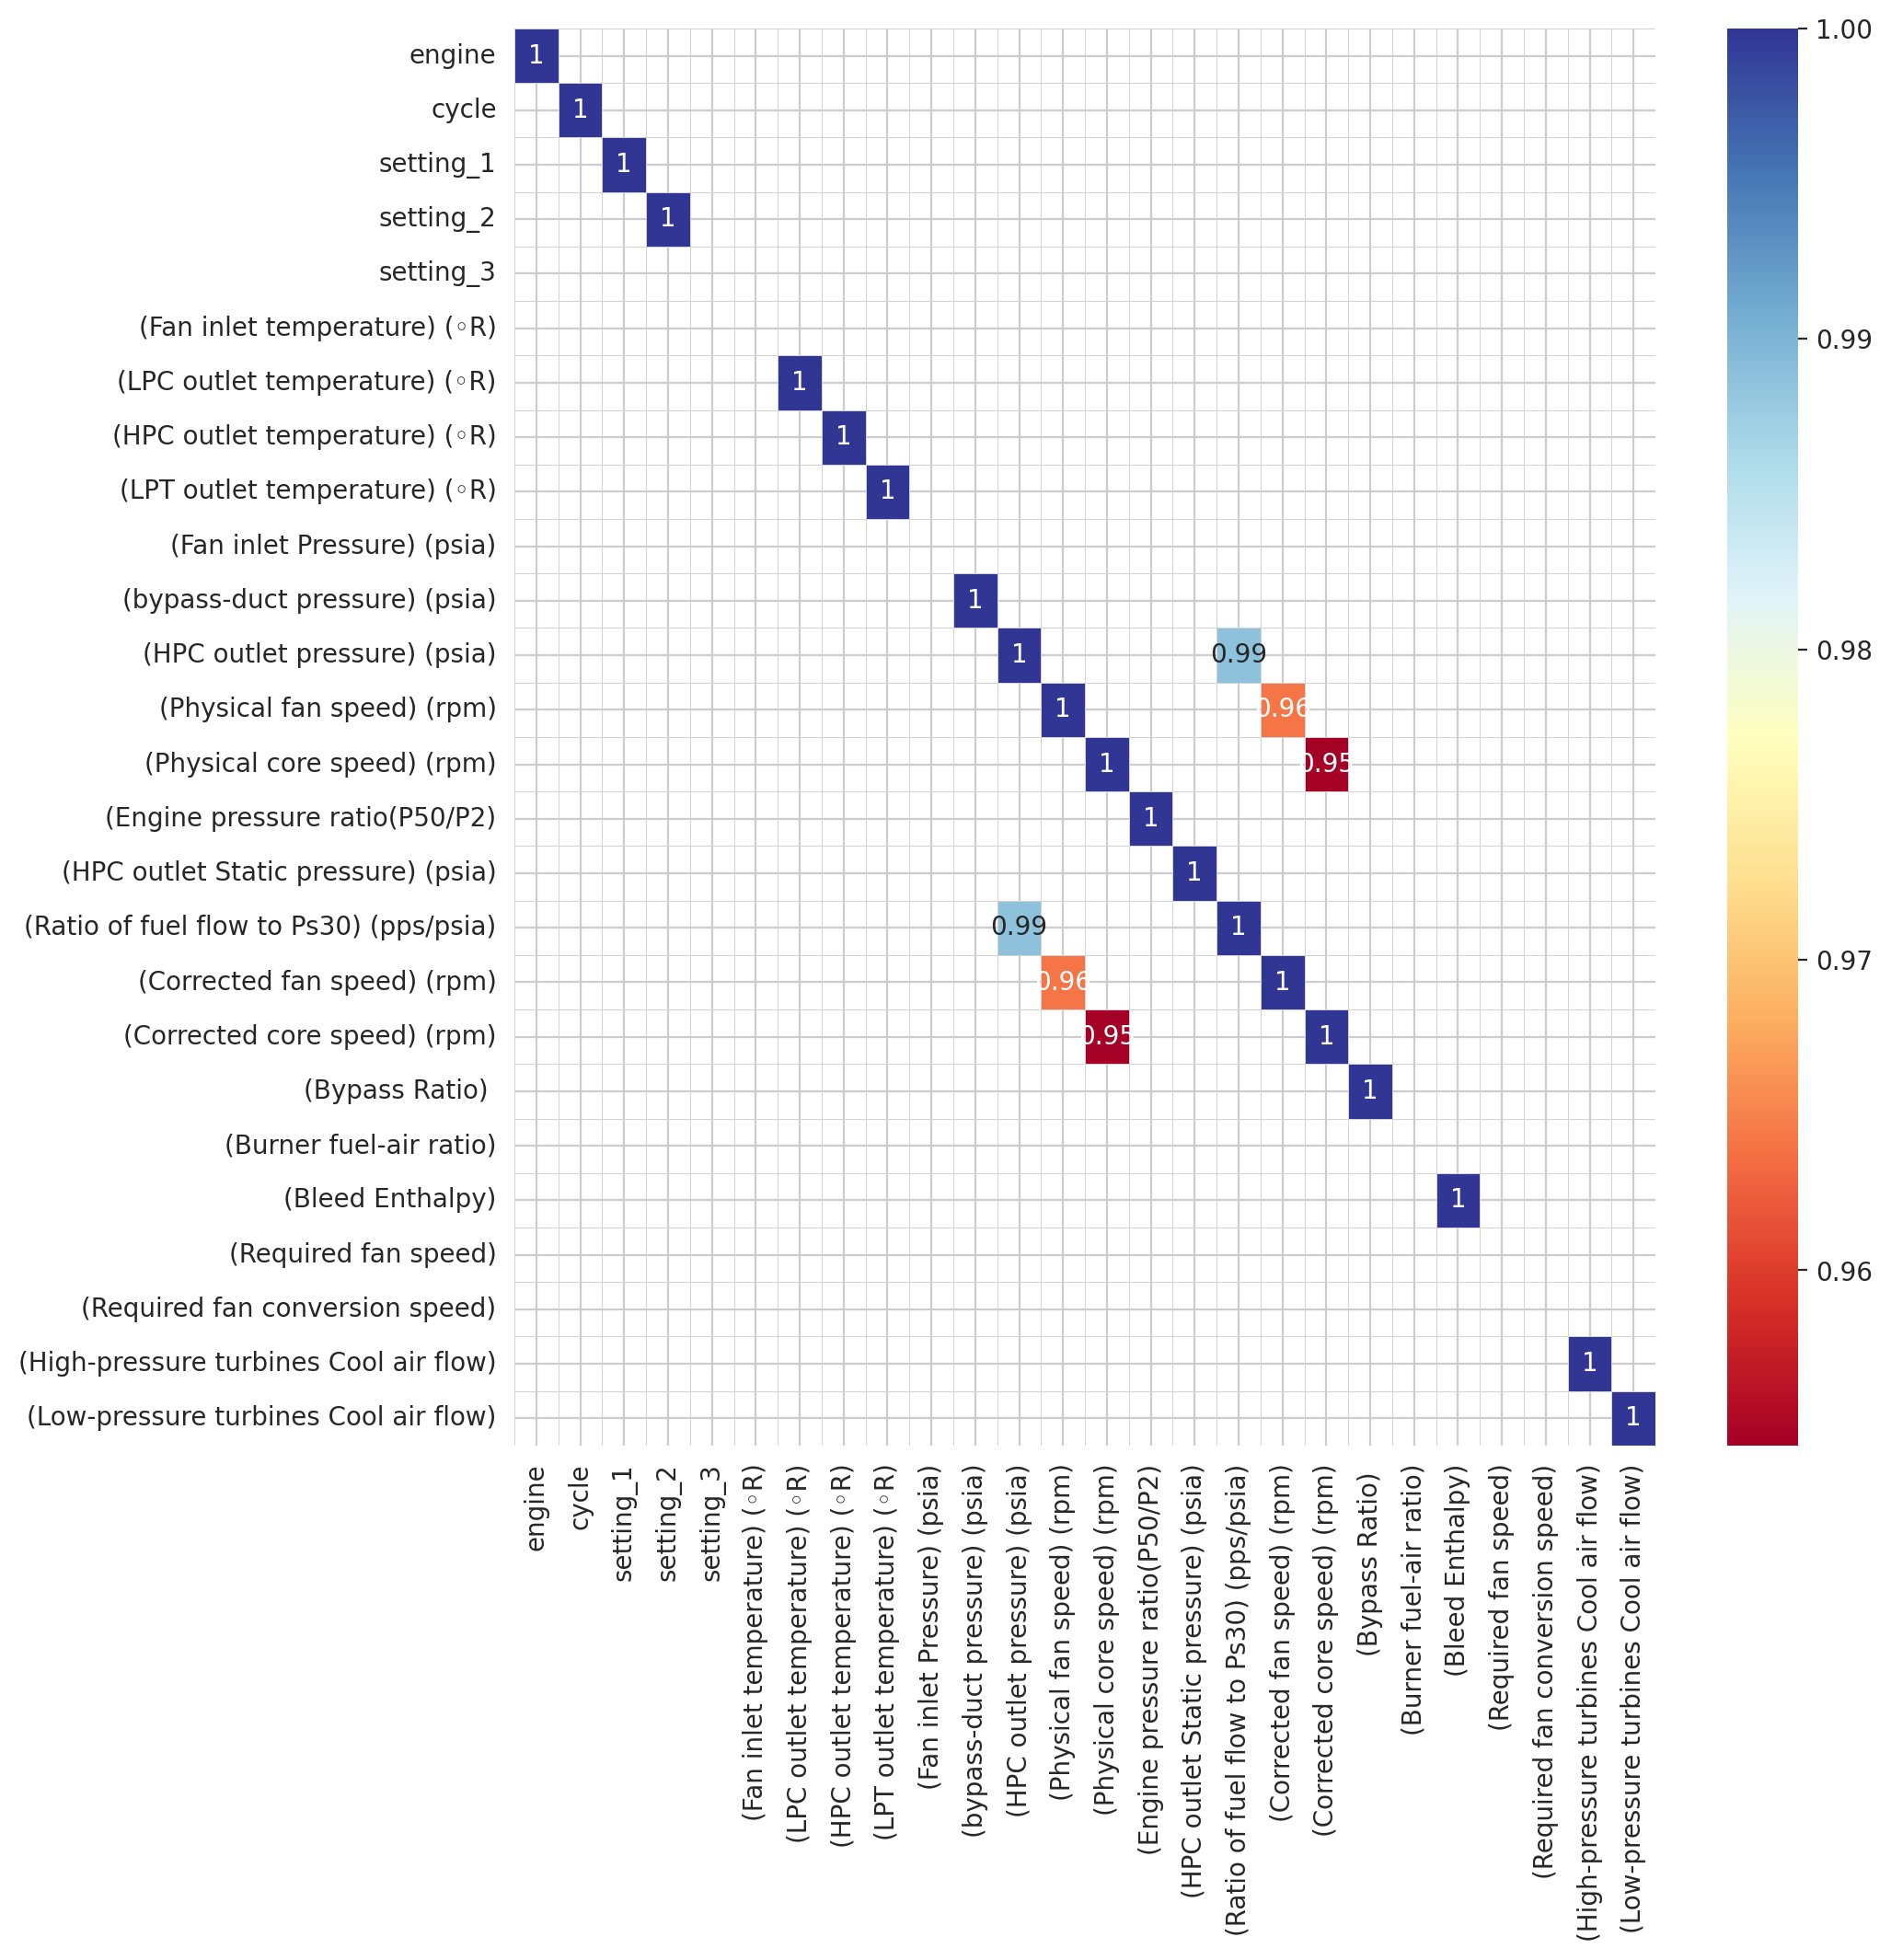

In [ ]:
plt.figure(figsize=(10,10))
threshold = 0.90
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df_train.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2,
            linecolor='lightgrey').set_facecolor('white')

In [ ]:
# drop the sensors wiith constant values
sens_const_values = []
for feature in list(setting_names + sensor_names):
    try:
        if df_train[feature].min()==df_train[feature].max():
            sens_const_values.append(feature)
    except:
        pass

print(sens_const_values)
df_train.drop(sens_const_values,axis=1,inplace=True)
df_test.drop(sens_const_values,axis=1,inplace=True)

['setting_3', '(Fan inlet temperature) (◦R)', '(Fan inlet Pressure) (psia)', '(Burner fuel-air ratio)', '(Required fan speed)', '(Required fan conversion speed)']


In [ ]:
# drop all but one of the highly correlated features
cor_matrix = df_train.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(corr_features)
df_train.drop(corr_features,axis=1,inplace=True)
df_test.drop(corr_features,axis=1,inplace=True)

['(Ratio of fuel flow to Ps30) (pps/psia)', '(Corrected fan speed) (rpm)', '(Corrected core speed) (rpm)']


In [ ]:
list(df_train)


['engine',
 'cycle',
 'setting_1',
 'setting_2',
 '(LPC outlet temperature) (◦R)',
 '(HPC outlet temperature) (◦R)',
 '(LPT outlet temperature) (◦R)',
 '(bypass-duct pressure) (psia)',
 '(HPC outlet pressure) (psia)',
 '(Physical fan speed) (rpm)',
 '(Physical core speed) (rpm)',
 '(Engine pressure ratio(P50/P2)',
 '(HPC outlet Static pressure) (psia)',
 '(Bypass Ratio) ',
 '(Bleed Enthalpy)',
 '(High-pressure turbines Cool air flow)',
 '(Low-pressure turbines Cool air flow)']

In [ ]:
df_train.head()

engine  cycle  setting_1  setting_2  (LPC outlet temperature) (◦R)  (HPC outlet temperature) (◦R)  (LPT outlet temperature) (◦R)  (bypass-duct pressure) (psia)  (HPC outlet pressure) (psia)  (Physical fan speed) (rpm)  (Physical core speed) (rpm)  (Engine pressure ratio(P50/P2)  (HPC outlet Static pressure) (psia)  (Bypass Ratio)   (Bleed Enthalpy)  (High-pressure turbines Cool air flow)  (Low-pressure turbines Cool air flow)
0       1      1    -0.0005     0.0004                         642.36                        1583.23                        1396.84                          21.61                        553.97                     2387.96                      9062.17                             1.3                                47.30           8.4246               391                                   39.11                                23.3537
1       1      2     0.0008    -0.0003                         642.50                        1584.69                        1396.89                          21.61                        554.55                     2388.00                      9061.78                             1.3                                47.23           8.4403               392                                   38.99                                23.4491
2       1      3    -0.0014    -0.0002                         642.18                        1582.35                        1405.61                          21.61                        554.43                     2388.03                      9070.23                             1.3                                47.22           8.3901               391                                   38.85                                23.3669
3       1      4    -0.0020     0.0001                         642.92                        1585.61                        1392.27                          21.61                        555.21                     2388.00                      9064.57                             1.3                                47.24           8.3878               392                                   38.96                                23.2951
4       1      5     0.0016     0.0000                         641.68                        1588.63                        1397.65                          21.61                        554.74                     2388.04                      9076.14                             1.3                                47.15           8.3869               392                                   39.14                                23.4583

In [ ]:
features = list(df_train.columns)

In [ ]:
for feature in features:
    print(feature + " - " + str(len(df_train[df_train[feature].isna()])))

engine - 0
cycle - 0
setting_1 - 0
setting_2 - 0
(LPC outlet temperature) (◦R) - 0
(HPC outlet temperature) (◦R) - 0
(LPT outlet temperature) (◦R) - 0
(bypass-duct pressure) (psia) - 0
(HPC outlet pressure) (psia) - 0
(Physical fan speed) (rpm) - 0
(Physical core speed) (rpm) - 0
(Engine pressure ratio(P50/P2) - 0
(HPC outlet Static pressure) (psia) - 0
(Bypass Ratio)  - 0
(Bleed Enthalpy) - 0
(High-pressure turbines Cool air flow) - 0
(Low-pressure turbines Cool air flow) - 0


In [ ]:
# define the maximum life of each engine, as this could be used to obtain the RUL at each point in time of the engine's life
df_train_RUL = df_train.groupby(['engine']).agg({'cycle':'max'})
df_train_RUL.rename(columns={'cycle':'life'},inplace=True)
df_train_RUL.head()

life
engine      
1        259
2        253
3        222
4        272
5        213

In [ ]:
df_train=df_train.merge(df_train_RUL,how='left',on=['engine'])

In [ ]:
df_train['RUL']=df_train['life']-df_train['cycle']
df_train.drop(['life'],axis=1,inplace=True)

# the RUL prediction is only useful nearer to the end of the engine's life, therefore we put an upper limit on the RUL
# this is a bit sneaky, since it supposes that the test set has RULs of less than this value, the closer you are
# to the true value, the more accurate the model will be
df_train['RUL'][df_train['RUL']>125]=125
df_train.head()

engine  cycle  setting_1  setting_2  (LPC outlet temperature) (◦R)  (HPC outlet temperature) (◦R)  (LPT outlet temperature) (◦R)  (bypass-duct pressure) (psia)  (HPC outlet pressure) (psia)  (Physical fan speed) (rpm)  (Physical core speed) (rpm)  (Engine pressure ratio(P50/P2)  (HPC outlet Static pressure) (psia)  (Bypass Ratio)   (Bleed Enthalpy)  (High-pressure turbines Cool air flow)  (Low-pressure turbines Cool air flow)  RUL
0       1      1    -0.0005     0.0004                         642.36                        1583.23                        1396.84                          21.61                        553.97                     2387.96                      9062.17                             1.3                                47.30           8.4246               391                                   39.11                                23.3537  125
1       1      2     0.0008    -0.0003                         642.50                        1584.69                        1396.89                          21.61                        554.55                     2388.00                      9061.78                             1.3                                47.23           8.4403               392                                   38.99                                23.4491  125
2       1      3    -0.0014    -0.0002                         642.18                        1582.35                        1405.61                          21.61                        554.43                     2388.03                      9070.23                             1.3                                47.22           8.3901               391                                   38.85                                23.3669  125
3       1      4    -0.0020     0.0001                         642.92                        1585.61                        1392.27                          21.61                        555.21                     2388.00                      9064.57                             1.3                                47.24           8.3878               392                                   38.96                                23.2951  125
4       1      5     0.0016     0.0000                         641.68                        1588.63                        1397.65                          21.61                        554.74                     2388.04                      9076.14                             1.3                                47.15           8.3869               392                                   39.14                                23.4583  125

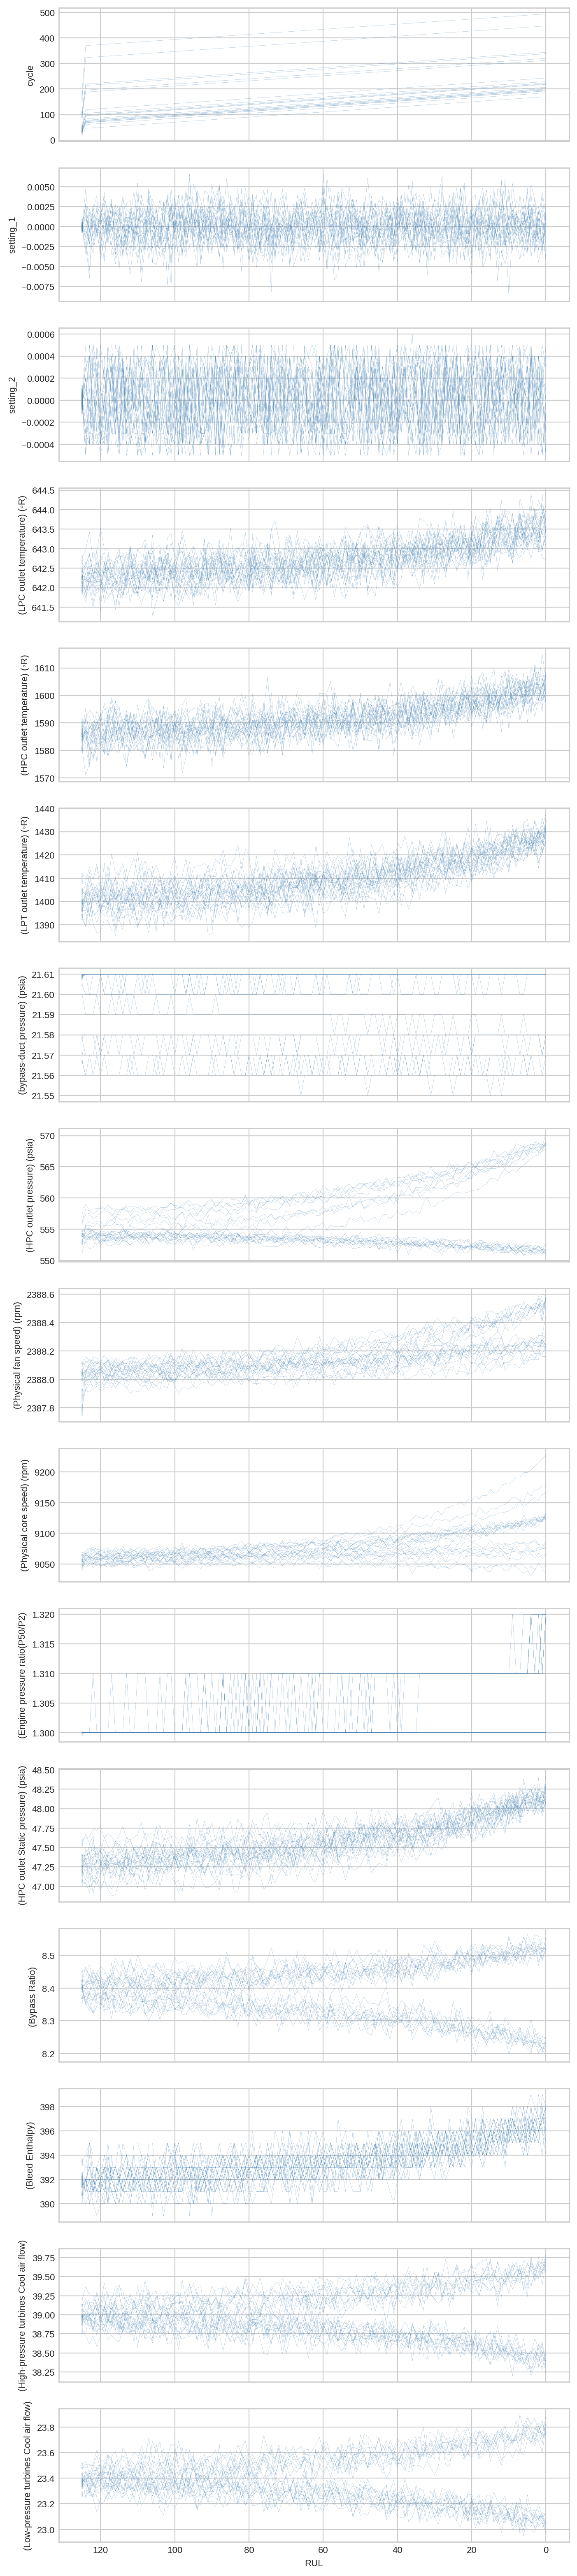

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize']=8,40
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 8
plt.rcParams['lines.linewidth'] = 0.1
plot_items = list(df_train.columns)[1:-1]
fig,ax = plt.subplots(len(plot_items),sharex=True)
ax[0].invert_xaxis()

engines = list(df_train['engine'].unique())

for engine in engines[10:30]:
    for i,item in enumerate(plot_items):
        f = sns.lineplot(data=df_train[df_train['engine']==engine],x='RUL',y=item,color='steelblue',ax=ax[i],
        )

In [ ]:
from scipy import signal
def smooth_function(x,window=15,order=3):
    return signal.savgol_filter(x,window,order)

In [ ]:
# awesome bit of code from https://www.kaggle.com/code/adibouayjan/house-price-step-by-step-modeling

Selected_Features = []
import statsmodels.api as sm

def backward_regression(X, y, initial_list=[], threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
X = df_train.iloc[:,1:-1]
y = df_train.iloc[:,-1]
backward_regression(X, y)

worst_feature : setting_2, 0.7900130653784562 
worst_feature : setting_1, 0.26901701063172384 

Selected Features:
['cycle', '(LPC outlet temperature) (◦R)', '(HPC outlet temperature) (◦R)', '(LPT outlet temperature) (◦R)', '(bypass-duct pressure) (psia)', '(HPC outlet pressure) (psia)', '(Physical fan speed) (rpm)', '(Physical core speed) (rpm)', '(Engine pressure ratio(P50/P2)', '(HPC outlet Static pressure) (psia)', '(Bypass Ratio) ', '(Bleed Enthalpy)', '(High-pressure turbines Cool air flow)', '(Low-pressure turbines Cool air flow)']


In [ ]:
Selected_Features

[['cycle',
  '(LPC outlet temperature) (◦R)',
  '(HPC outlet temperature) (◦R)',
  '(LPT outlet temperature) (◦R)',
  '(bypass-duct pressure) (psia)',
  '(HPC outlet pressure) (psia)',
  '(Physical fan speed) (rpm)',
  '(Physical core speed) (rpm)',
  '(Engine pressure ratio(P50/P2)',
  '(HPC outlet Static pressure) (psia)',
  '(Bypass Ratio) ',
  '(Bleed Enthalpy)',
  '(High-pressure turbines Cool air flow)',
  '(Low-pressure turbines Cool air flow)']]

In [ ]:
# X.head()
feature_names = Selected_Features[0]
np.shape(X)

(24720, 16)

In [ ]:
len(feature_names)

14

In [ ]:
import time
model_performance = pd.DataFrame(columns=['r-Squared','RMSE','total time'])

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, accuracy_score

import sklearn
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.ensemble import RandomForestRegressor

model_performance = pd.DataFrame(columns=['R2','RMSE', 'time to train','time to predict','total time'])


def R_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

In [ ]:
df_test_cycle = df_test.groupby(['engine']).agg({'cycle':'max'})
df_test_cycle.rename(columns={'cycle':'life'},inplace=True)
df_test_max = df_test.merge(df_test_cycle,how='left',on=['engine'])
df_test_max = df_test_max[(df_test_max['cycle']==df_test_max['life'])]
df_test_max.drop(['life'],axis=1,inplace=True)
# df_test_max

In [ ]:
X_train = df_train[feature_names]
y_train = df_train.iloc[:,-1]
X_test = df_test_max[feature_names]
y_test = df_test_RUL.iloc[:,-1]

In [ ]:
X_train.head()

cycle  (LPC outlet temperature) (◦R)  (HPC outlet temperature) (◦R)  (LPT outlet temperature) (◦R)  (bypass-duct pressure) (psia)  (HPC outlet pressure) (psia)  (Physical fan speed) (rpm)  (Physical core speed) (rpm)  (Engine pressure ratio(P50/P2)  (HPC outlet Static pressure) (psia)  (Bypass Ratio)   (Bleed Enthalpy)  (High-pressure turbines Cool air flow)  (Low-pressure turbines Cool air flow)
0      1                         642.36                        1583.23                        1396.84                          21.61                        553.97                     2387.96                      9062.17                             1.3                                47.30           8.4246               391                                   39.11                                23.3537
1      2                         642.50                        1584.69                        1396.89                          21.61                        554.55                     2388.00                      9061.78                             1.3                                47.23           8.4403               392                                   38.99                                23.4491
2      3                         642.18                        1582.35                        1405.61                          21.61                        554.43                     2388.03                      9070.23                             1.3                                47.22           8.3901               391                                   38.85                                23.3669
3      4                         642.92                        1585.61                        1392.27                          21.61                        555.21                     2388.00                      9064.57                             1.3                                47.24           8.3878               392                                   38.96                                23.2951
4      5                         641.68                        1588.63                        1397.65                          21.61                        554.74                     2388.04                      9076.14                             1.3                                47.15           8.3869               392                                   39.14                                23.4583

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# KNN

In [ ]:
# %%time
# from sklearn.neighbors import KNeighborsRegressor
# start = time.time()
# model = KNeighborsRegressor(n_neighbors=9).fit(X_train,y_train)
# end_train = time.time()
# y_predictions = model.predict(X_test) # These are the predictions from the test data.
# end_predict = time.time()

# # Calculate RMSE by taking the square root of mean_squared_error
# mse = mean_squared_error(y_test, y_predictions)
# rmse = np.sqrt(mse)

# model_performance.loc['kNN'] = [model.score(X_test,y_test),
#                                    rmse,
#                                    end_train-start,
#                                    end_predict-end_train,
#                                    end_predict-start]

# print('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)))
# print('Root Mean Squared Error: '+ "{:.2f}".format(rmse))

In [ ]:
# plt.style.use('seaborn-v0_8-whitegrid')
# plt.rcParams['figure.figsize']=5,5
# plt.rcParams['font.family'] = 'Calibri'
# plt.rcParams['lines.linewidth'] = 3
# plt.rcParams['axes.labelsize']=20
# plt.rcParams['xtick.labelsize']=16
# plt.rcParams['ytick.labelsize']=16
# plt.rcParams['legend.fontsize']=16

# fig,ax = plt.subplots()
# plt.title('Actual vs Predicted')
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# g = sns.scatterplot(x=y_test,
#                 y=y_predictions,
#                 s=100,
#                 alpha=0.6,
#                 linewidth=1,
#                 edgecolor='black',
#                 ax=ax)
# f = sns.lineplot(x=[min(y_test),max(y_test)],
#              y=[min(y_test),max(y_test)],
#              linewidth=4,
#              color='gray',
#              ax=ax)

# plt.annotate(text=('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)) +'\n' +
#                   'Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions))),
#              xy=(0,100),
#              size='medium')

# xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
# g.set_xticklabels(xlabels)
# ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
# g.set_yticklabels(ylabels)
# sns.despine()

In [ ]:
# pip install -U scikit-learn


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.metrics import mean_squared_error

# plt.style.use('seaborn-v0_8-whitegrid')
# plt.rcParams['figure.figsize'] = (5, 5)
# plt.rcParams['font.family'] = 'DejaVu Sans'
# plt.rcParams['lines.linewidth'] = 3
# plt.rcParams['axes.labelsize'] = 20
# plt.rcParams['xtick.labelsize'] = 16
# plt.rcParams['ytick.labelsize'] = 16
# plt.rcParams['legend.fontsize'] = 16

# fig, ax = plt.subplots()
# plt.title('Actual vs Predicted')
# plt.xlabel('Actual')
# plt.ylabel('Predicted')

# g = sns.scatterplot(
#     x=y_test,
#     y=y_predictions,
#     s=100,
#     alpha=0.6,
#     linewidth=1,
#     edgecolor='black',
#     ax=ax
# )

# sns.lineplot(
#     x=[min(y_test), max(y_test)],
#     y=[min(y_test), max(y_test)],
#     linewidth=4,
#     color='gray',
#     ax=ax
# )

# rmse = np.sqrt(mean_squared_error(y_test, y_predictions))
# x_pos = 0.05 * max(y_test)
# y_pos = 0.9 * max(y_predictions)

# plt.annotate(
#     text=(
#         'R-squared error: ' + "{:.2%}".format(model.score(X_test, y_test)) + '\n' +
#         'Root Mean Squared Error: ' + "{:.2f}".format(rmse)
#     ),
#     xy=(x_pos, y_pos),
#     size='medium',
#     bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # optional for readability
# )

# xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
# g.set_xticklabels(xlabels)
# ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
# g.set_yticklabels(ylabels)
# sns.despine()
# plt.show()


In [ ]:
# plt.style.use('seaborn-v0_8-whitegrid')
# plt.rcParams['figure.figsize']=20,5

# fig,ax = plt.subplots()
# plt.ylabel('RUL')
# plt.xlabel('Engine nr')

# g = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
#                 y=y_test,
#                 color='gray',
#                 label = 'actual',
#                 ax=ax)

# f = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
#                 y=y_predictions,
#                 color='steelblue',
#                 label = 'predictions',
#                 ax=ax)
# ax.legend()

# SVM

In [ ]:
# %%time
# from sklearn.svm import SVR
# start = time.time()
# model = SVR(kernel="rbf", C=100, gamma=0.5, epsilon=0.01).fit(X_train,y_train)
# end_train = time.time()
# y_predictions = model.predict(X_test) # These are the predictions from the test data.
# end_predict = time.time()

# # Calculate RMSE
# mse = mean_squared_error(y_test, y_predictions)
# rmse = np.sqrt(mse)

# model_performance.loc['SVM'] = [model.score(X_test,y_test),
#                                    rmse,
#                                    end_train-start,
#                                    end_predict-end_train,
#                                    end_predict-start]

# print('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)))
# print('Root Mean Squared Error: '+ "{:.2f}".format(rmse))

In [ ]:
# plt.style.use('seaborn-v0_8-whitegrid')
# plt.rcParams['figure.figsize'] = (5, 5)
# plt.rcParams['font.family'] = 'DejaVu Sans'
# plt.rcParams['lines.linewidth'] = 3
# plt.rcParams['axes.labelsize'] = 20
# plt.rcParams['xtick.labelsize'] = 16
# plt.rcParams['ytick.labelsize'] = 16
# plt.rcParams['legend.fontsize'] = 16

# fig,ax = plt.subplots()
# plt.title('Actual vs Predicted')
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# g = sns.scatterplot(x=y_test,
#                 y=y_predictions,
#                 s=100,
#                 alpha=0.6,
#                 linewidth=1,
#                 edgecolor='black',
#                 ax=ax)
# f = sns.lineplot(x=[min(y_test),max(y_test)],
#              y=[min(y_test),max(y_test)],
#              linewidth=4,
#              color='gray',
#              ax=ax)

# rmse = np.sqrt(mean_squared_error(y_test, y_predictions))
# x_pos = 0.05 * max(y_test)
# y_pos = 0.9 * max(y_predictions)

# plt.annotate(
#     text=(
#         'R-squared error: ' + "{:.2%}".format(model.score(X_test, y_test)) + '\n' +
#         'Root Mean Squared Error: ' + "{:.2f}".format(rmse)
#     ),
#     xy=(x_pos, y_pos),
#     size='medium',
#     bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # optional for readability
# )

# xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
# g.set_xticklabels(xlabels)
# ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
# g.set_yticklabels(ylabels)
# sns.despine()

In [ ]:
# plt.style.use('seaborn-v0_8-whitegrid')
# plt.rcParams['figure.figsize']=20,5

# fig,ax = plt.subplots()
# plt.ylabel('RUL')
# plt.xlabel('Engine nr')

# g = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
#                 y=y_test,
#                 color='gray',
#                 label = 'actual',
#                 ax=ax)

# f = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
#                 y=y_predictions,
#                 color='steelblue',
#                 label = 'predictions',
#                 ax=ax)
# ax.legend()

# Random Forest

In [ ]:
# type(X_train)

In [ ]:
# %%time
# from sklearn.ensemble import RandomForestRegressor
# start = time.time()
# model = RandomForestRegressor(n_jobs=-1,
#                               n_estimators=500,
#                               min_samples_leaf=1,
#                               max_features='sqrt',
#                              ).fit(X_train,y_train)
# end_train = time.time()
# y_predictions = model.predict(X_test) # These are the predictions from the test data.
# end_predict = time.time()

# # Calculate RMSE
# mse = mean_squared_error(y_test, y_predictions)
# rmse = np.sqrt(mse)

# model_performance.loc['Random Forest'] = [model.score(X_test,y_test),
#                                    rmse,
#                                    end_train-start,
#                                    end_predict-end_train,
#                                    end_predict-start]

# print('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)))
# print('Root Mean Squared Error: '+ "{:.2f}".format(rmse))

In [ ]:
# plt.style.use('seaborn-v0_8-whitegrid')
# plt.rcParams['figure.figsize']=5,5

# fig,ax = plt.subplots()
# plt.title('Actual vs Predicted')
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# g = sns.scatterplot(x=y_test,
#                 y=y_predictions,
#                 s=100,
#                 alpha=0.6,
#                 linewidth=1,
#                 edgecolor='black',
#                 ax=ax)
# f = sns.lineplot(x=[min(y_test),max(y_test)],
#              y=[min(y_test),max(y_test)],
#              linewidth=4,
#              color='gray',
#              ax=ax)

# rmse = np.sqrt(mean_squared_error(y_test, y_predictions))
# x_pos = 0.05 * max(y_test)
# y_pos = 0.9 * max(y_predictions)

# plt.annotate(
#     text=(
#         'R-squared error: ' + "{:.2%}".format(model.score(X_test, y_test)) + '\n' +
#         'Root Mean Squared Error: ' + "{:.2f}".format(rmse)
#     ),
#     xy=(x_pos, y_pos),
#     size='medium',
#     bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # optional for readability
# )

# xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
# g.set_xticklabels(xlabels)
# ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
# g.set_yticklabels(ylabels)
# sns.despine()

In [ ]:
# plt.style.use('seaborn-v0_8-whitegrid')
# plt.rcParams['figure.figsize']=20,5

# fig,ax = plt.subplots()
# plt.ylabel('RUL')
# plt.xlabel('Engine nr')

# g = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
#                 y=y_test,
#                 color='gray',
#                 label = 'actual',
#                 ax=ax)

# f = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
#                 y=y_predictions,
#                 color='steelblue',
#                 label = 'predictions',
#                 ax=ax)
# ax.legend()

# LSTM

In [ ]:
# !pip install tensorflow keras --upgrade


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, LSTM, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import sklearn

In [ ]:
model = keras.Sequential()
model.add(LSTM(100,
                return_sequences=True,
               input_shape=(1,X_train.shape[1])
              ))
model.add(BatchNormalization())
model.add(LSTM(50,
                return_sequences=True,
               activation='tanh'
              ))
model.add(Dropout(0.5))
model.add(LSTM(10,
               return_sequences=True,
               activation='tanh',
              ))
model.add(Dropout(0.5))
model.add(Dense(100,
               activation='relu',
              ))
model.add(Dense(1))

In [ ]:
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

In [ ]:
model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 100)         │        46,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 100)         │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 50)          │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1, 10)          │         2,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 10)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1, 100)         │         1,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1, 1)           │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,241 (313.44 KB)

 Trainable params: 80,041 (312.66 KB)

 Non-trainable params: 200 (800.00 B)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=4, min_lr=1e-7, verbose=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_s, X_val, y_train_s, y_val = train_test_split(X_train, y_train, test_size=0.1)

#The LSTM input layer must be 3D.
#The meaning of the 3 input dimensions are: samples, time steps, and features.
#reshape input data
X_train_reshaped = X_train_s.reshape(X_train_s.shape[0], 1, X_train_s.shape[1])
X_val_reshaped = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
%%time

start = time.time()
history = model.fit(x=X_train_reshaped,y=y_train_s,
                    validation_data = (X_val_reshaped,y_val),
                    epochs = 30,
                    # shuffle = True,
                    batch_size = 500,
                    callbacks=[reduce_lr]
                   )
end_train = time.time()
y_predictions = model.predict(X_test_reshaped) # These are the predictions from the test data.
end_predict = time.time()
y_predictions = y_predictions[:,0][:,0]

# Calculate RMSE
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)

model_performance.loc['LSTM'] = [sklearn.metrics.r2_score(y_test, y_predictions),
                                   rmse,
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]

print('R-squared error: '+ "{:.2%}".format(sklearn.metrics.r2_score(y_test, y_predictions)))
print('Root Mean Squared Error: '+ "{:.2f}".format(rmse))

Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 10327.8252 - val_loss: 10315.0371 - learning_rate: 0.0010
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 9614.0176 - val_loss: 8265.3066 - learning_rate: 0.0010
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 7565.2393 - val_loss: 5635.6611 - learning_rate: 0.0010
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 5157.8364 - val_loss: 3436.9963 - learning_rate: 0.0010
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 3182.1289 - val_loss: 1949.2122 - learning_rate: 0.0010
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1932.3477 - val_loss: 1177.0356 - learning_rate: 0.0010
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1384.6019 - val_loss: 755.9677 - learning_rate: 0.0010
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1169.4705 - val_loss: 634.9604 - learning_rate: 0.0010
Epoch 9/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1143.0299 - val_loss:

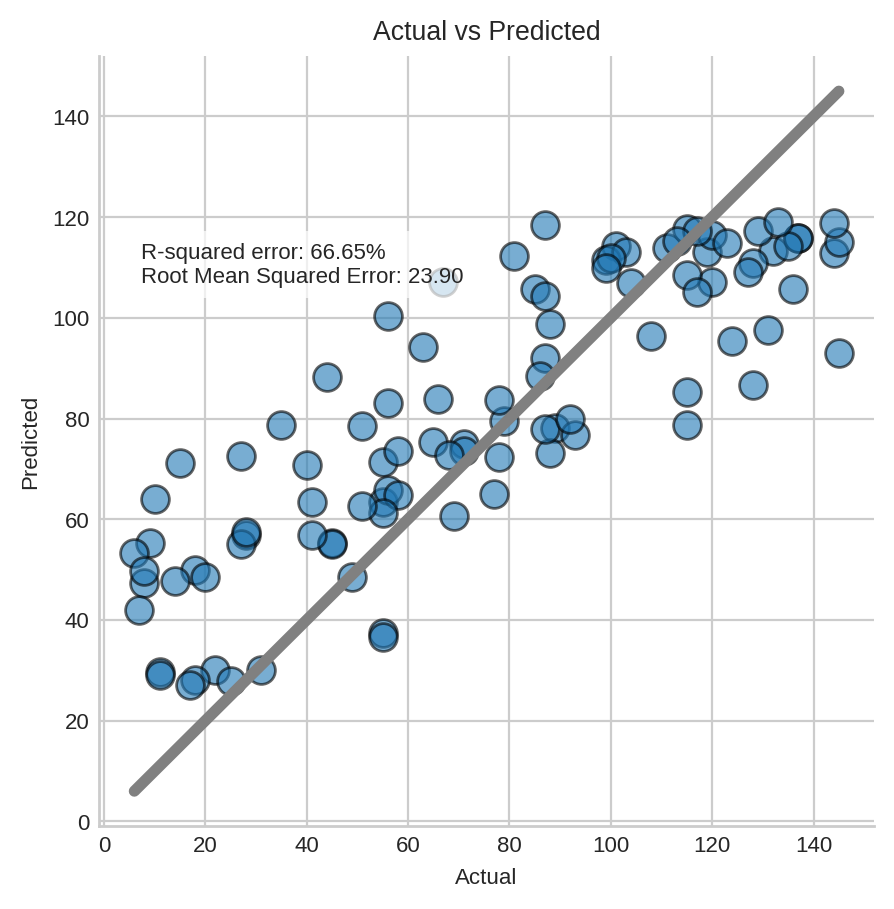

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (5, 5)

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_predictions,
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray',
             ax=ax)

rmse = np.sqrt(mean_squared_error(y_test, y_predictions))
r2 = sklearn.metrics.r2_score(y_test, y_predictions) # Calculate R2 using sklearn.metrics.r2_score
x_pos = 0.05 * max(y_test)
y_pos = 0.9 * max(y_predictions)

plt.annotate(
    text=(
        'R-squared error: ' + "{:.2%}".format(r2) + '\n' + # Use the calculated R2
        'Root Mean Squared Error: ' + "{:.2f}".format(rmse)
    ),
    xy=(x_pos, y_pos),
    size='medium',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # optional for readability
)

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

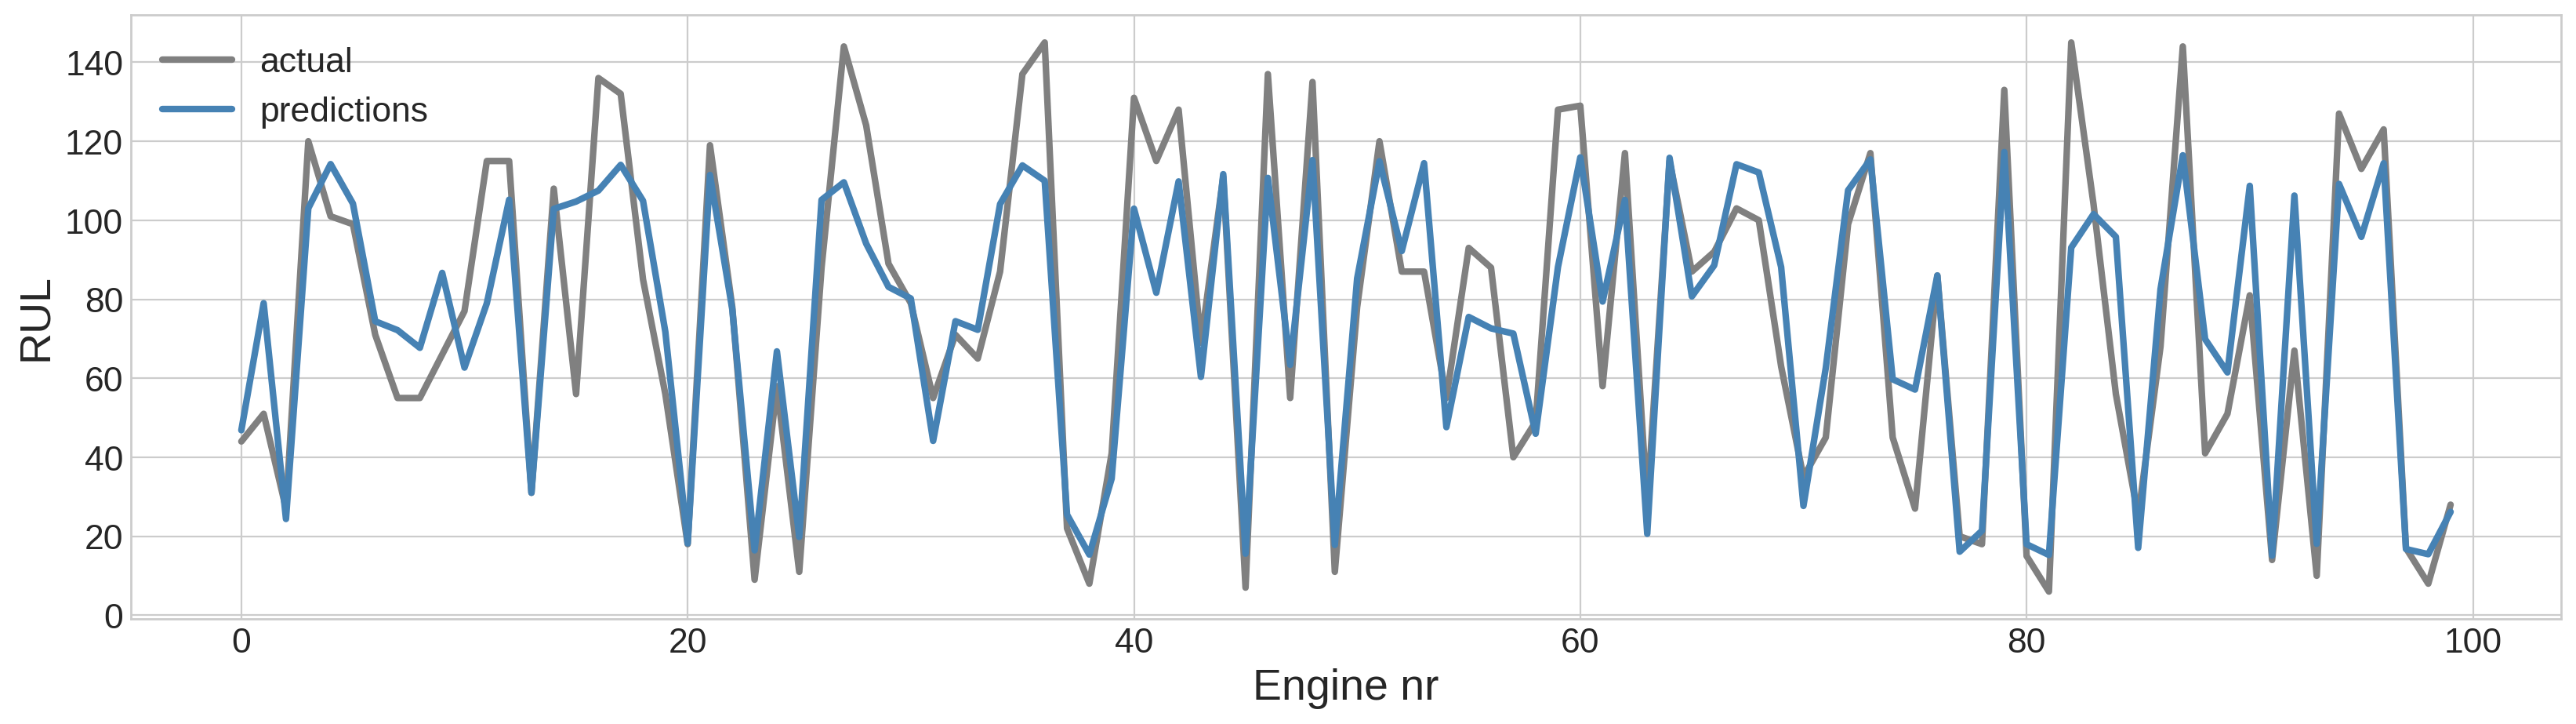

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize']=20,5

fig,ax = plt.subplots()
plt.ylabel('RUL')
plt.xlabel('Engine nr')

g = sns.lineplot(x = np.arange(0,len(df_test['engine'].unique())),
                y=y_test,
                color='gray',
                label = 'actual',
                ax=ax)

f = sns.lineplot(x = np.arange(0,len(df_test['engine'].unique())),
                y=y_predictions,
                color='steelblue',
                label = 'predictions',
                ax=ax)
ax.legend()

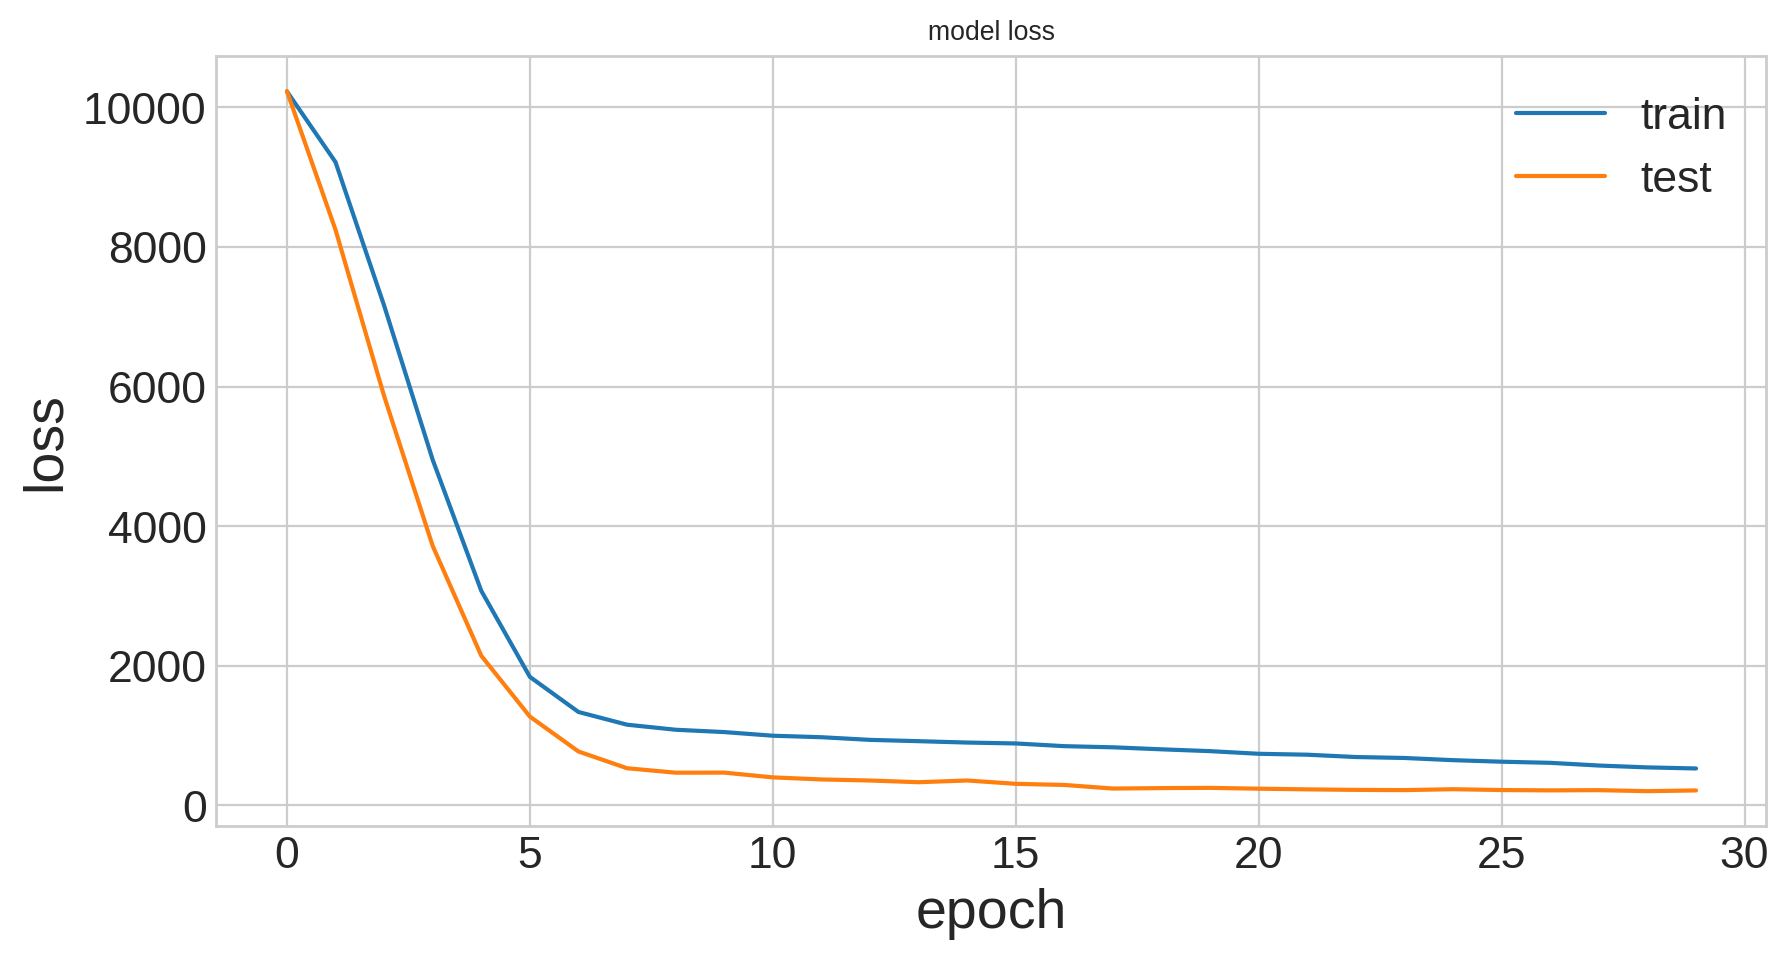

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize']=5,5
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 8
plt.rcParams['lines.linewidth'] = 1.5
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


In [ ]:
# model_performance.style.background_gradient(cmap='RdYlBu_r').format({'R2': '{:.2%}',
#                                                                      'RMSE': '{:.2f}',
#                                                                      'time to train':'{:.3f}',
#                                                                      'time to predict':'{:.3f}',
#                                                                      'total time':'{:.3f}',
#                                                                      })

# Best Model

##############

# Outlier detection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import IsolationForest

# ========================================
# OUTLIER DETECTION FOR NUMPY ARRAYS
# ========================================

def remove_outliers_numpy(X_train, y_train, method='iqr', column_names=None):
    """
    Remove outliers from numpy arrays

    Parameters:
    -----------
    X_train : numpy.ndarray
        Training features array
    y_train : numpy.ndarray
        Training target array
    method : str
        'iqr', 'zscore', or 'isolation'
    column_names : list, optional
        Feature names for better visualization

    Returns:
    --------
    X_train_clean : numpy.ndarray
        Clean training features
    y_train_clean : numpy.ndarray
        Clean training targets
    """

    print("="*60)
    print("OUTLIER DETECTION AND REMOVAL")
    print("="*60)
    print(f"Original X_train shape: {X_train.shape}")
    print(f"Original y_train shape: {y_train.shape}")

    # Create column names if not provided
    if column_names is None:
        column_names = [f'feature_{i}' for i in range(X_train.shape[1])]

    # Convert to DataFrame for easier manipulation
    df = pd.DataFrame(X_train, columns=column_names)

    # Visualize before outlier removal
    print("\n" + "="*60)
    print("VISUALIZING DATA BEFORE OUTLIER REMOVAL")
    print("="*60)
    visualize_boxplots(df, column_names, "Before Outlier Removal")

    # Detect outliers based on method
    print("\n" + "="*60)
    print(f"DETECTING OUTLIERS USING {method.upper()} METHOD")
    print("="*60)

    if method == 'iqr':
        outlier_indices = detect_outliers_iqr(df, column_names)
    elif method == 'zscore':
        outlier_indices = detect_outliers_zscore(df, column_names, threshold=3)
    elif method == 'isolation':
        outlier_indices = detect_outliers_isolation_forest(df, column_names)
    else:
        raise ValueError("Method must be 'iqr', 'zscore', or 'isolation'")

    # Create mask for clean data (inliers)
    mask = np.ones(len(X_train), dtype=bool)
    mask[outlier_indices] = False

    # Remove outliers
    X_train_clean = X_train[mask]
    y_train_clean = y_train[mask]

    # Statistics
    print("\n" + "="*60)
    print("OUTLIER REMOVAL SUMMARY")
    print("="*60)
    print(f"Total rows in original data: {len(X_train)}")
    print(f"Outliers detected and removed: {len(outlier_indices)}")
    print(f"Clean data rows: {len(X_train_clean)}")
    print(f"Percentage of data retained: {(len(X_train_clean)/len(X_train))*100:.2f}%")

    # Visualize after outlier removal
    df_clean = pd.DataFrame(X_train_clean, columns=column_names)
    print("\n" + "="*60)
    print("VISUALIZING DATA AFTER OUTLIER REMOVAL")
    print("="*60)
    visualize_boxplots(df_clean, column_names, "After Outlier Removal")

    # Compare statistics
    print("\n" + "="*60)
    print("STATISTICS COMPARISON")
    print("="*60)
    compare_statistics(df, df_clean, column_names)

    return X_train_clean, y_train_clean


def detect_outliers_iqr(df, columns):
    """Detect outliers using IQR method"""
    outlier_indices = []

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_list = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        outlier_indices.extend(outlier_list)

        print(f"\n{col}:")
        print(f"  Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}")
        print(f"  Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print(f"  Outliers: {len(outlier_list)}")

    return list(set(outlier_indices))


def detect_outliers_zscore(df, columns, threshold=3):
    """Detect outliers using Z-score method"""
    outlier_indices = []

    for col in columns:
        z_scores = np.abs(stats.zscore(df[col]))
        outlier_list = np.where(z_scores > threshold)[0].tolist()
        outlier_indices.extend(outlier_list)

        print(f"\n{col}:")
        print(f"  Mean={df[col].mean():.2f}, Std={df[col].std():.2f}")
        print(f"  Z-score threshold: {threshold}")
        print(f"  Outliers: {len(outlier_list)}")

    return list(set(outlier_indices))


def detect_outliers_isolation_forest(df, columns, contamination=0.05):
    """Detect outliers using Isolation Forest"""
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    outlier_labels = iso_forest.fit_predict(df[columns])
    outlier_indices = np.where(outlier_labels == -1)[0].tolist()

    print(f"\nIsolation Forest (contamination={contamination}):")
    print(f"  Outliers detected: {len(outlier_indices)}")

    return outlier_indices


def visualize_boxplots(df, columns, title):
    """Create boxplots for visualization"""
    n_cols = len(columns)
    n_rows = (n_cols + 3) // 4  # 4 plots per row

    fig, axes = plt.subplots(n_rows, min(4, n_cols), figsize=(16, 4*n_rows))

    if n_cols == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes if n_cols > 1 else [axes]
    else:
        axes = axes.flatten()

    for idx, col in enumerate(columns):
        axes[idx].boxplot(df[col].dropna(), vert=True)
        axes[idx].set_title(col, fontsize=10)
        axes[idx].set_ylabel('Value')
        axes[idx].grid(True, alpha=0.3)

    # Hide extra subplots
    for idx in range(len(columns), len(axes)):
        axes[idx].axis('off')

    plt.suptitle(title, fontsize=14, y=1.00)
    plt.tight_layout()
    plt.show()


def compare_statistics(df_original, df_clean, columns):
    """Compare statistics before and after outlier removal"""
    print(f"\n{'Column':<20} {'Metric':<10} {'Original':<12} {'Clean':<12} {'Change':<10}")
    print("-" * 70)

    for col in columns:
        # Mean
        orig_mean = df_original[col].mean()
        clean_mean = df_clean[col].mean()
        change = ((clean_mean - orig_mean) / orig_mean * 100) if orig_mean != 0 else 0
        print(f"{col:<20} {'Mean':<10} {orig_mean:<12.2f} {clean_mean:<12.2f} {change:>+9.2f}%")

        # Std
        orig_std = df_original[col].std()
        clean_std = df_clean[col].std()
        change = ((clean_std - orig_std) / orig_std * 100) if orig_std != 0 else 0
        print(f"{'':<20} {'Std':<10} {orig_std:<12.2f} {clean_std:<12.2f} {change:>+9.2f}%")

        # Min/Max
        print(f"{'':<20} {'Min':<10} {df_original[col].min():<12.2f} {df_clean[col].min():<12.2f}")
        print(f"{'':<20} {'Max':<10} {df_original[col].max():<12.2f} {df_clean[col].max():<12.2f}")
        print()


# ========================================
# USAGE - COPY THIS TO YOUR NOTEBOOK
# ========================================

"""
# STEP 1: Remove outliers from your training data
# Choose method: 'iqr' (recommended), 'zscore', or 'isolation'

X_train_clean, y_train_clean = remove_outliers_numpy(
    X_train=X_train,
    y_train=y_train,
    method='iqr',  # Options: 'iqr', 'zscore', 'isolation'
    column_names=None  # Provide your actual column names if you have them
)

# STEP 2: Now use the clean data for model training
# Your X_train_clean and y_train_clean are ready!

# Example:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()
# model.fit(X_train_clean, y_train_clean)
# predictions = model.predict(X_test)
"""

# ========================================
# ALTERNATIVE: If you want only specific method
# ========================================

def remove_outliers_iqr_only(X_train, y_train):
    """Quick IQR-based outlier removal"""
    df = pd.DataFrame(X_train)
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Create mask for rows without outliers
    mask = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

    X_train_clean = X_train[mask]
    y_train_clean = y_train[mask]

    print(f"Original size: {len(X_train)}")
    print(f"Removed: {len(X_train) - len(X_train_clean)}")
    print(f"Clean size: {len(X_train_clean)}")

    return X_train_clean, y_train_clean


def remove_outliers_zscore_only(X_train, y_train, threshold=3):
    """Quick Z-score based outlier removal"""
    z_scores = np.abs(stats.zscore(X_train))
    mask = (z_scores < threshold).all(axis=1)

    X_train_clean = X_train[mask]
    y_train_clean = y_train[mask]

    print(f"Original size: {len(X_train)}")
    print(f"Removed: {len(X_train) - len(X_train_clean)}")
    print(f"Clean size: {len(X_train_clean)}")

    return X_train_clean, y_train_clean

OUTLIER DETECTION AND REMOVAL
Original X_train shape: (24720, 14)
Original y_train shape: (24720,)

VISUALIZING DATA BEFORE OUTLIER REMOVAL


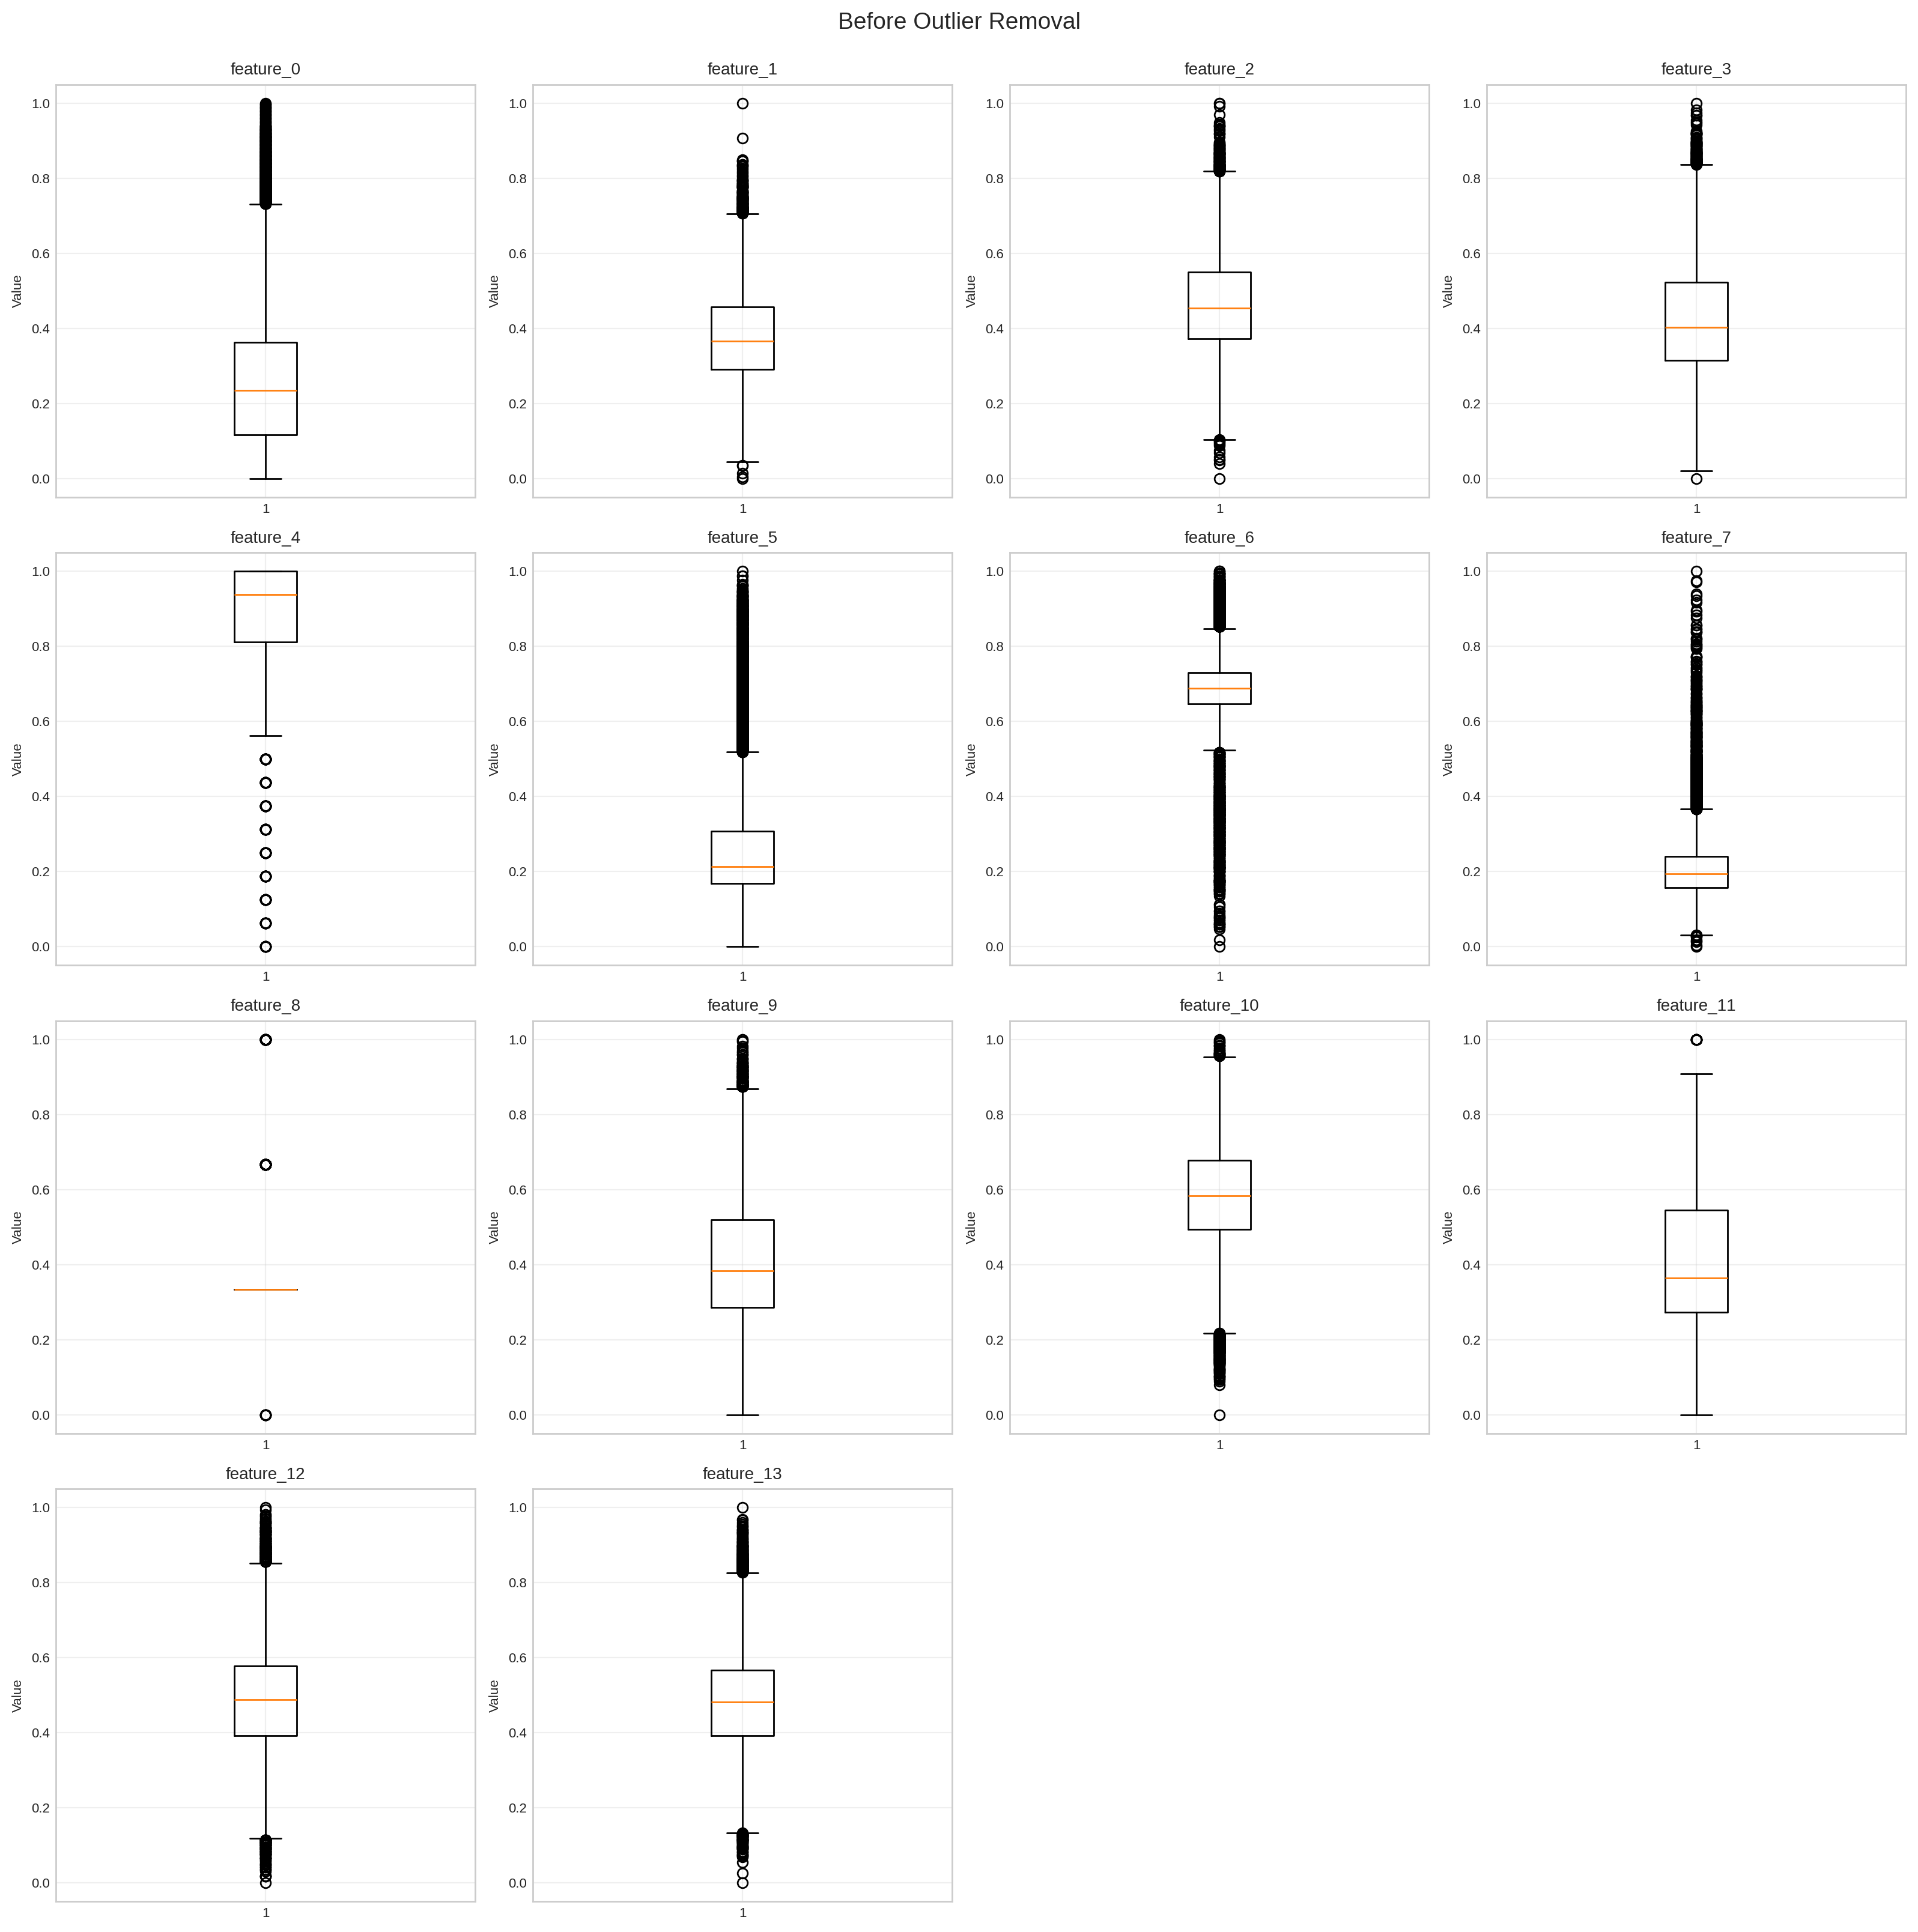


DETECTING OUTLIERS USING IQR METHOD

feature_0:
  Q1=0.12, Q3=0.36, IQR=0.25
  Bounds: [-0.25, 0.73]
  Outliers: 688

feature_1:
  Q1=0.29, Q3=0.46, IQR=0.17
  Bounds: [0.04, 0.71]
  Outliers: 190

feature_2:
  Q1=0.37, Q3=0.55, IQR=0.18
  Bounds: [0.10, 0.82]
  Outliers: 180

feature_3:
  Q1=0.31, Q3=0.52, IQR=0.21
  Bounds: [0.00, 0.84]
  Outliers: 173

feature_4:
  Q1=0.81, Q3=1.00, IQR=0.19
  Bounds: [0.53, 1.28]
  Outliers: 151

feature_5:
  Q1=0.17, Q3=0.31, IQR=0.14
  Bounds: [-0.04, 0.52]
  Outliers: 2188

feature_6:
  Q1=0.65, Q3=0.73, IQR=0.08
  Bounds: [0.52, 0.85]
  Outliers: 1714

feature_7:
  Q1=0.16, Q3=0.24, IQR=0.08
  Bounds: [0.03, 0.37]
  Outliers: 1844

feature_8:
  Q1=0.33, Q3=0.33, IQR=0.00
  Bounds: [0.33, 0.33]
  Outliers: 2906

feature_9:
  Q1=0.29, Q3=0.52, IQR=0.23
  Bounds: [-0.07, 0.87]
  Outliers: 153

feature_10:
  Q1=0.49, Q3=0.68, IQR=0.18
  Bounds: [0.22, 0.95]
  Outliers: 406

feature_11:
  Q1=0.27, Q3=0.55, IQR=0.27
  Bounds: [-0.14, 0.95]
  Outlier

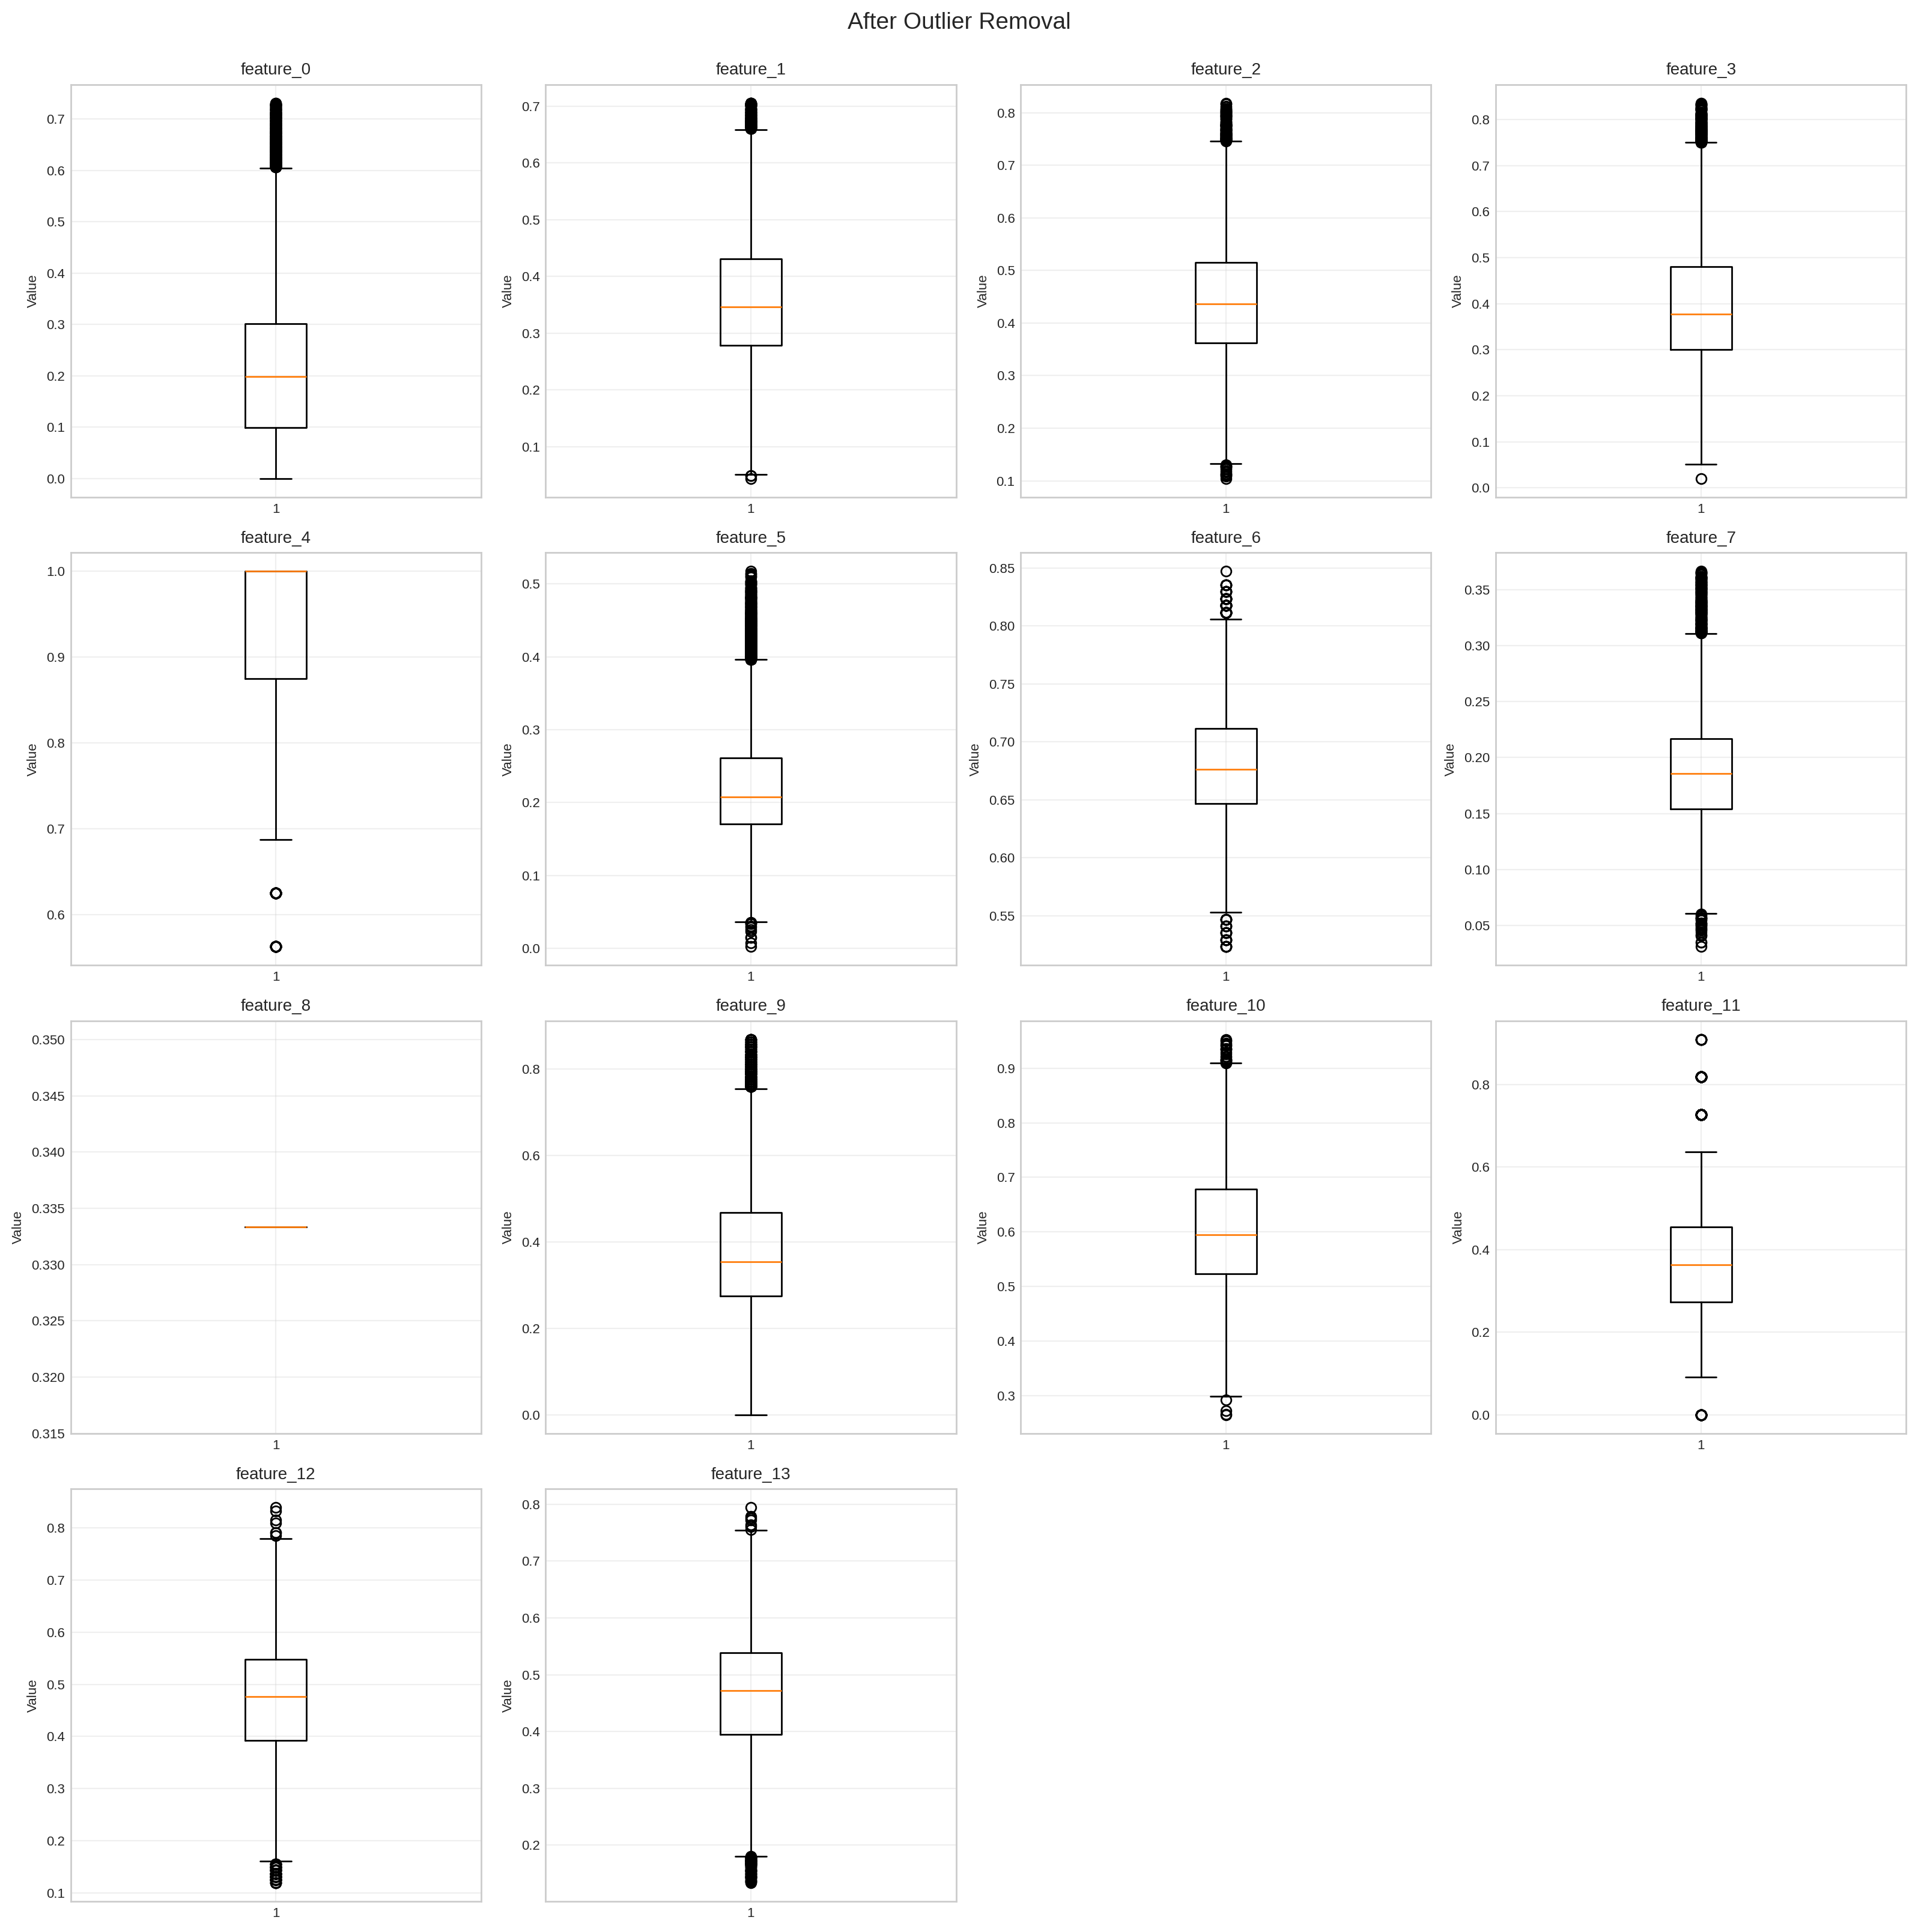


STATISTICS COMPARISON

Column               Metric     Original     Clean        Change    
----------------------------------------------------------------------
feature_0            Mean       0.26         0.22            -17.86%
                     Std        0.19         0.15            -21.70%
                     Min        0.00         0.00        
                     Max        1.00         0.73        

feature_1            Mean       0.38         0.36             -5.26%
                     Std        0.12         0.11             -8.73%
                     Min        0.00         0.04        
                     Max        1.00         0.70        

feature_2            Mean       0.47         0.44             -4.98%
                     Std        0.13         0.11            -14.51%
                     Min        0.00         0.10        
                     Max        1.00         0.82        

feature_3            Mean       0.43         0.40             -7.03%
  

In [ ]:
# STEP 1: Remove outliers from your training data
# Choose method: 'iqr' (recommended), 'zscore', or 'isolation'

X_train_clean, y_train_clean = remove_outliers_numpy(
    X_train=X_train,
    y_train=y_train,
    method='iqr',  # Options: 'iqr', 'zscore', 'isolation'
    column_names=None  # Provide your actual column names if you have them
)

# STEP 2: Now use the clean data for model training
# Your X_train_clean and y_train_clean are ready!

# Example:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()
# model.fit(X_train_clean, y_train_clean)
# predictions = model.predict(X_test)

In [ ]:
X_train_clean.shape

(19892, 14)

In [ ]:
y_train_clean.shape

(19892,)

# Training after outlier detection

# LSTM

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, LSTM, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import sklearn

In [ ]:
model = keras.Sequential()
model.add(LSTM(100,
                return_sequences=True,
               input_shape=(1,X_train_clean.shape[1])
              ))
model.add(BatchNormalization())
model.add(LSTM(50,
                return_sequences=True,
               activation='tanh'
              ))
model.add(Dropout(0.5))
model.add(LSTM(10,
               return_sequences=True,
               activation='tanh',
              ))
model.add(Dropout(0.5))
model.add(Dense(100,
               activation='relu',
              ))
model.add(Dense(1))

In [ ]:
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

In [ ]:
model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 100)         │        46,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 100)         │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 50)          │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1, 10)          │         2,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 10)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1, 100)         │         1,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1, 1)           │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,241 (313.44 KB)

 Trainable params: 80,041 (312.66 KB)

 Non-trainable params: 200 (800.00 B)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=4, min_lr=1e-7, verbose=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_s, X_val, y_train_s, y_val = train_test_split(X_train_clean, y_train_clean, test_size=0.1)

#The LSTM input layer must be 3D.
#The meaning of the 3 input dimensions are: samples, time steps, and features.
#reshape input data
X_train_reshaped = X_train_s.reshape(X_train_s.shape[0], 1, X_train_s.shape[1])
X_val_reshaped = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
%%time

start = time.time()
history = model.fit(x=X_train_reshaped,y=y_train_s,
                    validation_data = (X_val_reshaped,y_val),
                    epochs = 20,
                    # shuffle = True,
                    batch_size = 500,
                    callbacks=[reduce_lr]
                   )
end_train = time.time()
y_predictions_lstm2 = model.predict(X_test_reshaped) # These are the predictions from the test data.
end_predict = time.time()
y_predictions_lstm2 = y_predictions_lstm2[:,0][:,0]

# Calculate RMSE
mse = mean_squared_error(y_test, y_predictions_lstm2)
rmse = np.sqrt(mse)

model_performance.loc['LSTM'] = [sklearn.metrics.r2_score(y_test, y_predictions_lstm2),
                                   rmse,
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]

print('R-squared error: '+ "{:.2%}".format(sklearn.metrics.r2_score(y_test, y_predictions_lstm2)))
print('Root Mean Squared Error: '+ "{:.2f}".format(rmse))

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 11825.4414 - val_loss: 11777.1562 - learning_rate: 0.0010
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11498.9268 - val_loss: 11140.6152 - learning_rate: 0.0010
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10298.3164 - val_loss: 8551.4512 - learning_rate: 0.0010
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8407.3496 - val_loss: 6122.1025 - learning_rate: 0.0010
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5629.3066 - val_loss: 3841.2751 - learning_rate: 0.0010
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3550.8599 - val_loss: 2256.2578 - learning_rate: 0.0010
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2230.1208 - val_loss: 1421.6669 - learning_rate: 0.0010
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1609.0027 - val_loss: 1097.1555 - learning_rate: 0.0010
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1336.7863 - val_

# KNN

In [ ]:
%%time
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np

start = time.time()

# Define parameter distributions for random search
param_distributions = {
    'n_neighbors': randint(1, 31),              # Random integers between 1 and 30
    'weights': ['uniform', 'distance'],         # Weight function
    'p': [1, 2],                                # 1 = Manhattan, 2 = Euclidean
    'leaf_size': randint(20, 50),               # Leaf size for tree algorithms
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm to compute neighbors
}

# Create base model
knn = KNeighborsRegressor()

# RandomizedSearchCV - faster than GridSearchCV
random_search = RandomizedSearchCV(
    knn,
    param_distributions=param_distributions,
    n_iter=20,              # Number of parameter settings sampled
    cv=3,                   # 3-fold cross-validation (fast)
    scoring='r2',           # Optimize for R-squared
    n_jobs=-1,              # Use all CPU cores
    random_state=42,
    verbose=1
)

# Fit the random search
random_search.fit(X_train_clean, y_train_clean)

# Best model
model = random_search.best_estimator_
print(f"\nBest parameters: {random_search.best_params_}")
print(f"Best CV score: {random_search.best_score_:.4f}")

end_train = time.time()

# Predictions
y_predictions_knn = model.predict(X_test)
end_predict = time.time()

# Store performance
model_performance.loc['kNN'] = [
    model.score(X_test, y_test),
    np.sqrt(mean_squared_error(y_test, y_predictions_knn)),
    end_train - start,
    end_predict - end_train,
    end_predict - start
]

# Use model.score for R-squared
print('\nR-squared error: ' + "{:.2%}".format(model.score(X_test, y_test)))
# Use np.sqrt() for RMSE
print('Root Mean Squared Error: ' + "{:.2f}".format(np.sqrt(mean_squared_error(y_test, y_predictions_knn))))

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best parameters: {'algorithm': 'kd_tree', 'leaf_size': 49, 'n_neighbors': 30, 'p': 1, 'weights': 'distance'}
Best CV score: 0.7276

R-squared error: 53.14%
Root Mean Squared Error: 28.34
CPU times: user 475 ms, sys: 76.1 ms, total: 552 ms
Wall time: 1min 20s


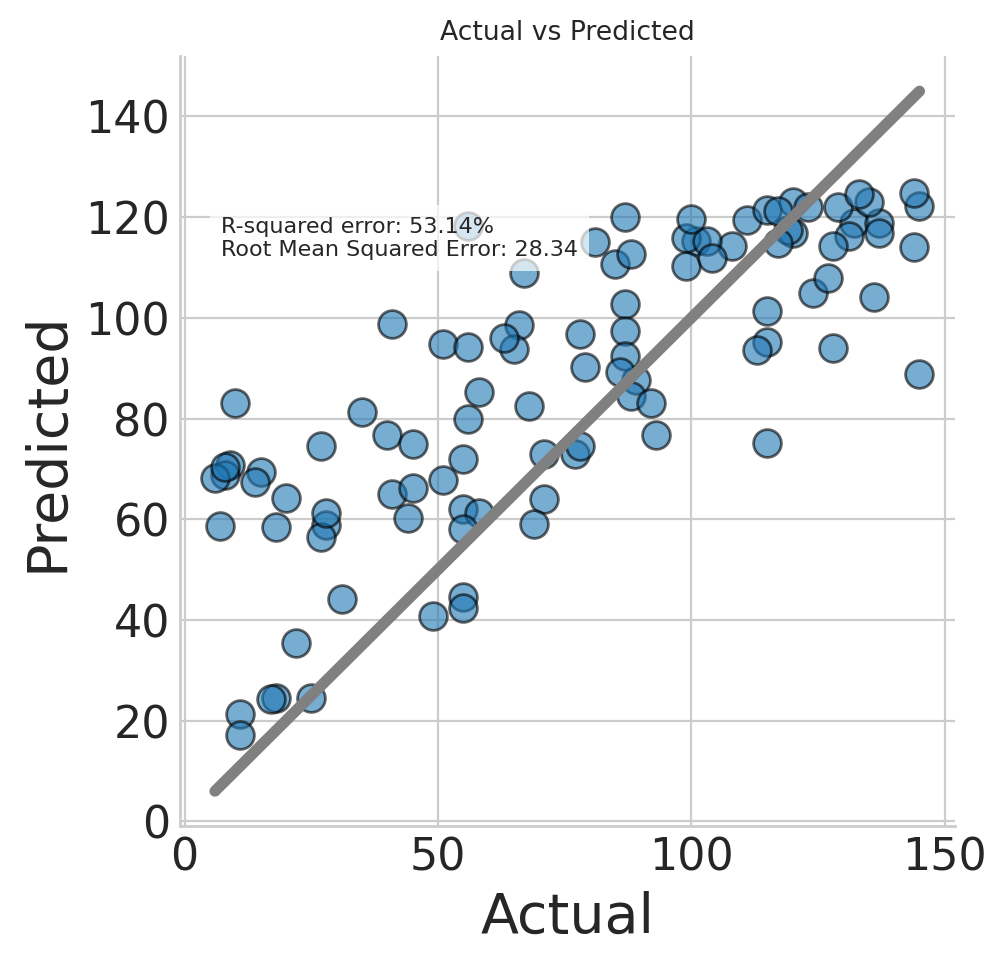

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16

fig, ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

g = sns.scatterplot(
    x=y_test,
    y=y_predictions_knn,
    s=100,
    alpha=0.6,
    linewidth=1,
    edgecolor='black',
    ax=ax
)

sns.lineplot(
    x=[min(y_test), max(y_test)],
    y=[min(y_test), max(y_test)],
    linewidth=4,
    color='gray',
    ax=ax
)

rmse = np.sqrt(mean_squared_error(y_test, y_predictions_knn))
x_pos = 0.05 * max(y_test)
y_pos = 0.9 * max(y_predictions_knn)

plt.annotate(
    text=(
        'R-squared error: ' + "{:.2%}".format(model.score(X_test, y_test)) + '\n' +
        'Root Mean Squared Error: ' + "{:.2f}".format(rmse)
    ),
    xy=(x_pos, y_pos),
    size='medium',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # optional for readability
)

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()
plt.show()


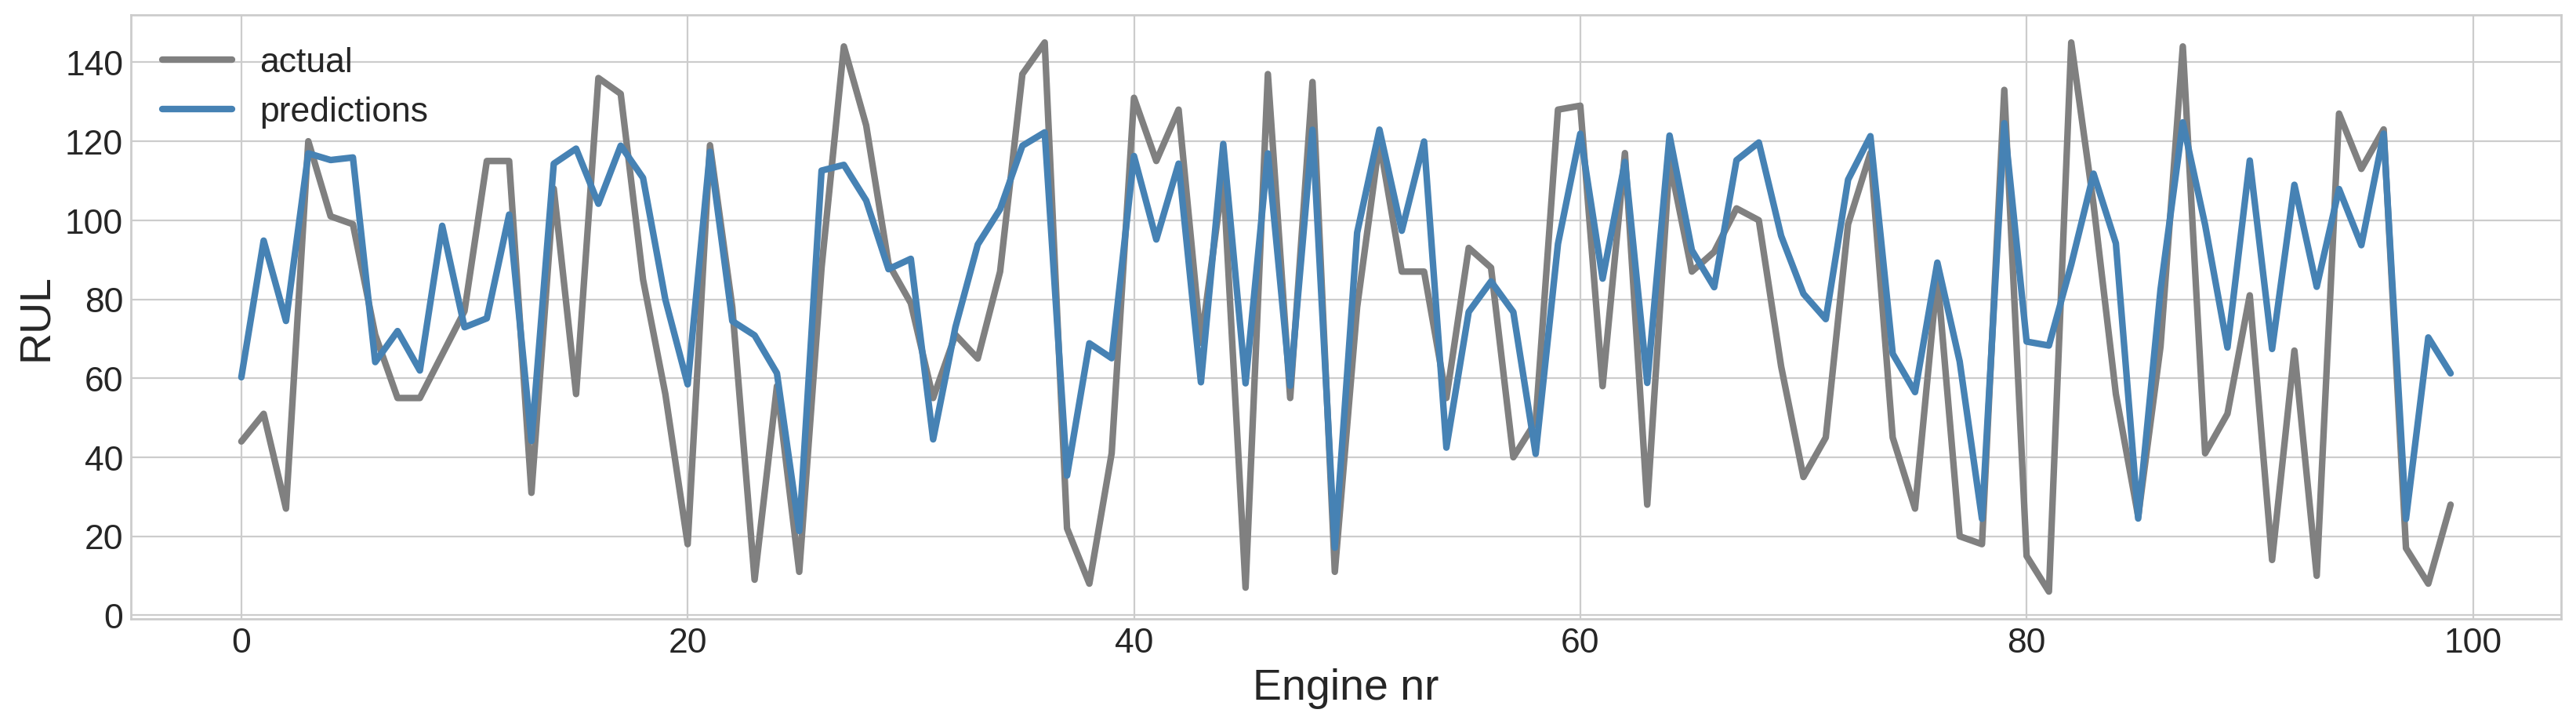

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize']=20,5

fig,ax = plt.subplots()
plt.ylabel('RUL')
plt.xlabel('Engine nr')

g = sns.lineplot(x = np.arange(0,len(df_test['engine'].unique())),
                y=y_test,
                color='gray',
                label = 'actual',
                ax=ax)

f = sns.lineplot(x = np.arange(0,len(df_test['engine'].unique())),
                y=y_predictions_knn,
                color='steelblue',
                label = 'predictions',
                ax=ax)
ax.legend()

# SVR

In [ ]:
%%time
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform
import numpy as np

start = time.time()

# Define parameter distributions for random search
param_distributions = {
    'C': loguniform(1, 1000),           # Log-uniform between 1 and 1000
    'gamma': loguniform(0.001, 1),      # Log-uniform between 0.001 and 1
    'epsilon': uniform(0.001, 0.1)      # Uniform between 0.001 and 0.101
}

# Create base model
svr = SVR(kernel="rbf")

# RandomizedSearchCV - faster than GridSearchCV
random_search = RandomizedSearchCV(
    svr,
    param_distributions=param_distributions,
    n_iter=20,              # Number of parameter settings sampled
    cv=3,                   # 3-fold cross-validation (fast)
    scoring='r2',           # Optimize for R-squared
    n_jobs=-1,              # Use all CPU cores
    random_state=42,
    verbose=1
)

# Fit the random search
random_search.fit(X_train_clean, y_train_clean)

# Best model
model = random_search.best_estimator_
print(f"\nBest parameters: {random_search.best_params_}")
print(f"Best CV score: {random_search.best_score_:.4f}")

end_train = time.time()

# Predictions
y_predictions_svr = model.predict(X_test)
end_predict = time.time()

# Store performance
model_performance.loc['SVM'] = [
    model.score(X_test, y_test),
    np.sqrt(mean_squared_error(y_test, y_predictions_svr)),
    end_train - start,
    end_predict - end_train,
    end_predict - start
]

print('\nR-squared error: ' + "{:.2%}".format(model.score(X_test, y_test)))
print('Root Mean Squared Error: ' + "{:.2f}".format(np.sqrt(mean_squared_error(y_test, y_predictions_svr))))

NameError: name 'time' is not defined

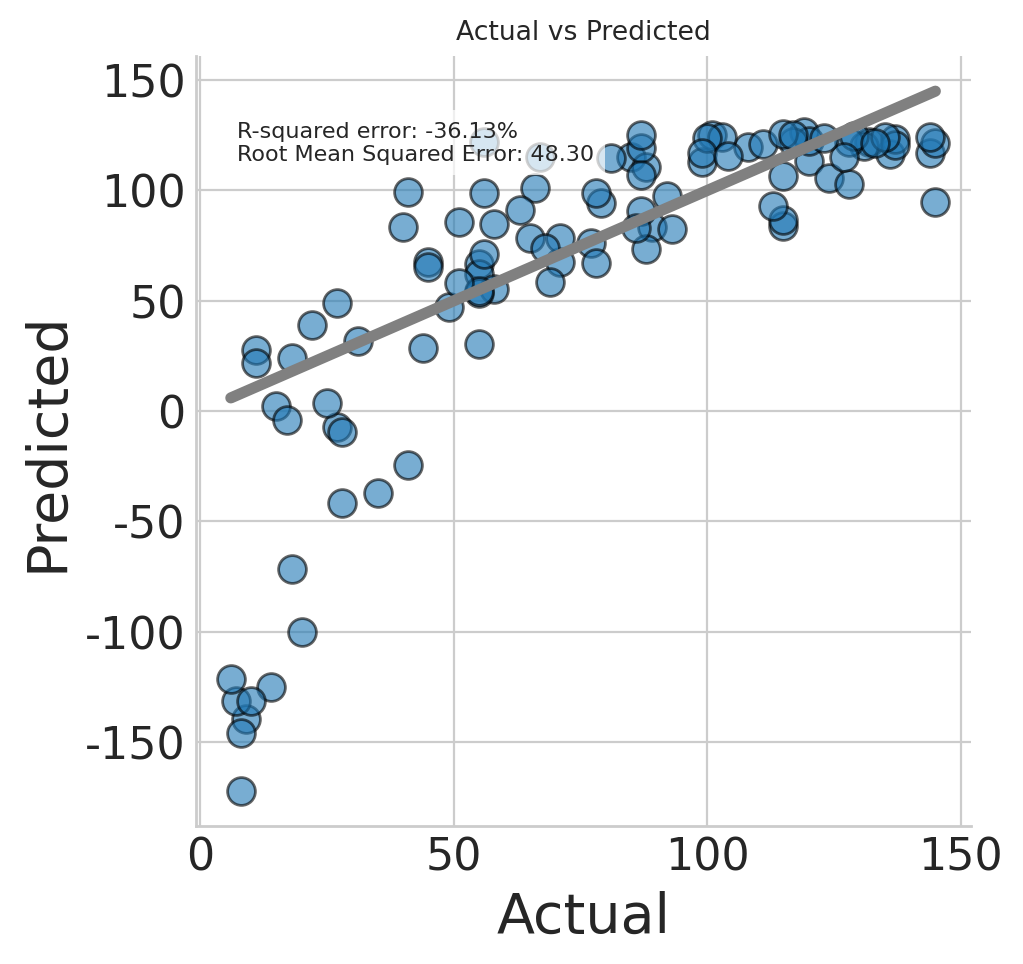

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_predictions_svr,
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray',
             ax=ax)

rmse = np.sqrt(mean_squared_error(y_test, y_predictions_svr))
x_pos = 0.05 * max(y_test)
y_pos = 0.9 * max(y_predictions_svr)

plt.annotate(
    text=(
        'R-squared error: ' + "{:.2%}".format(model.score(X_test, y_test)) + '\n' +
        'Root Mean Squared Error: ' + "{:.2f}".format(rmse)
    ),
    xy=(x_pos, y_pos),
    size='medium',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # optional for readability
)

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

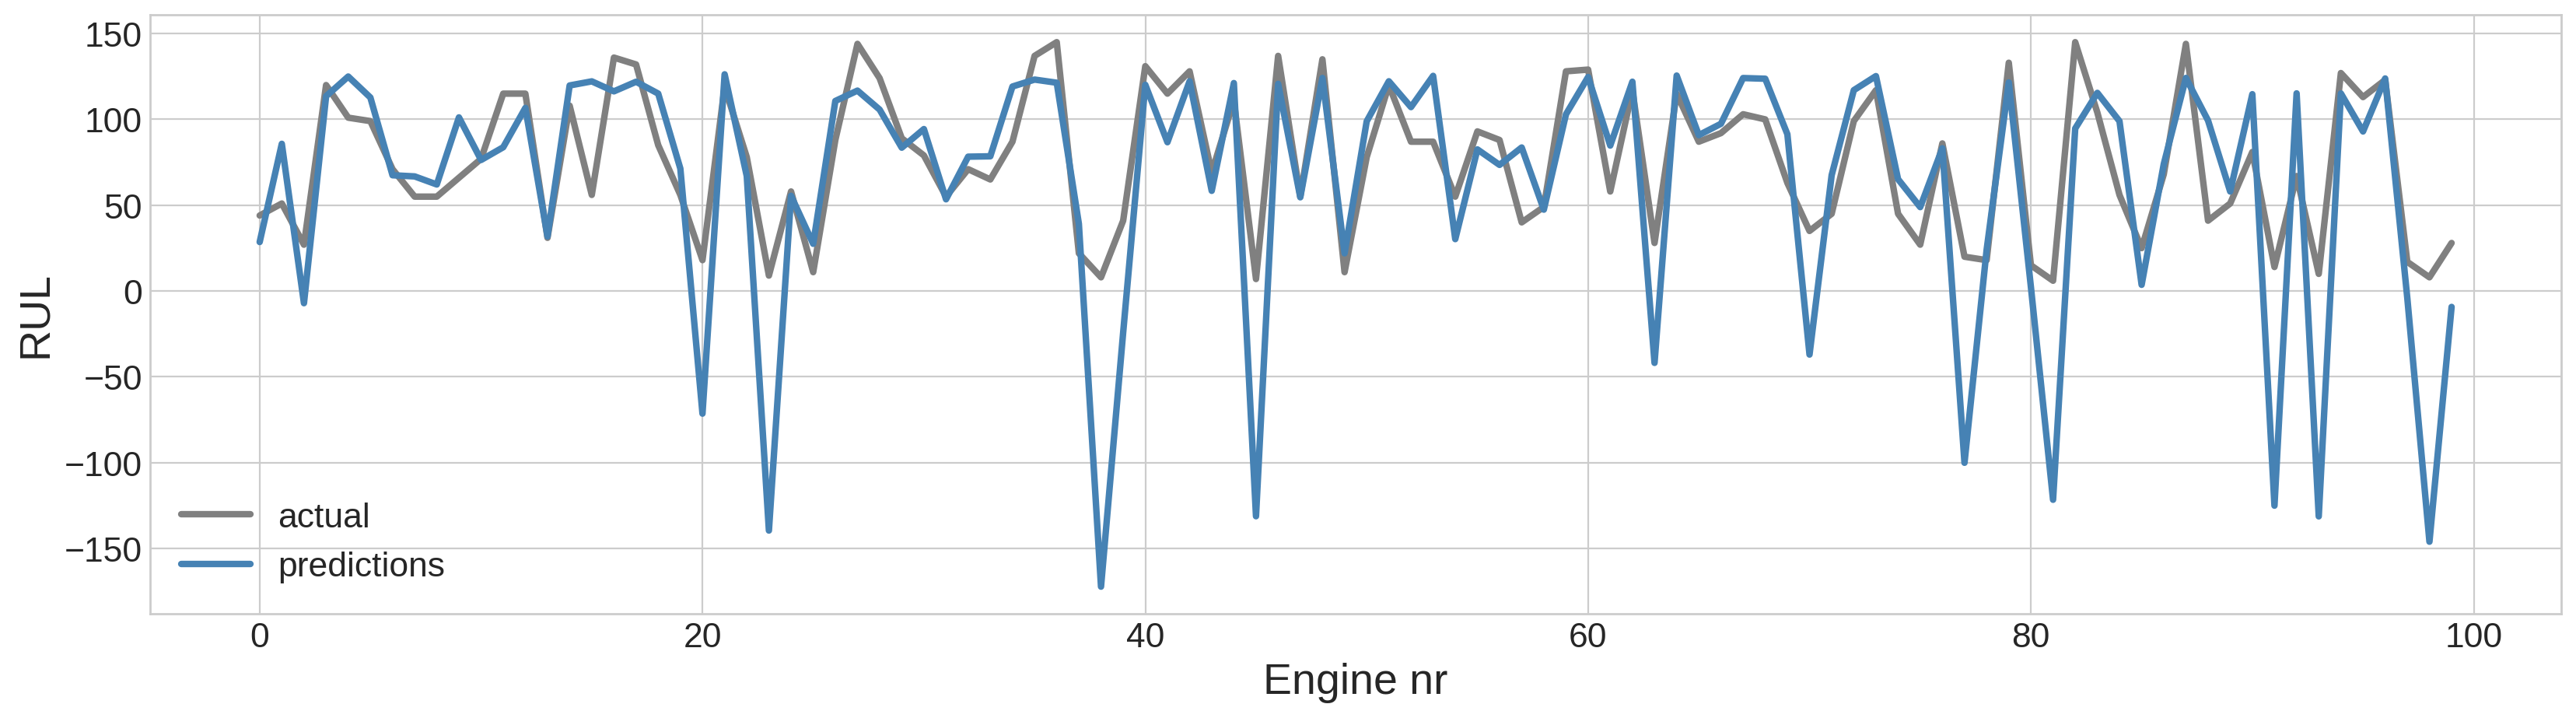

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize']=20,5

fig,ax = plt.subplots()
plt.ylabel('RUL')
plt.xlabel('Engine nr')

g = sns.lineplot(x = np.arange(0,len(df_test['engine'].unique())),
                y=y_test,
                color='gray',
                label = 'actual',
                ax=ax)

f = sns.lineplot(x = np.arange(0,len(df_test['engine'].unique())),
                y=y_predictions_svr,
                color='steelblue',
                label = 'predictions',
                ax=ax)
ax.legend()

# Random Forest

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import numpy as np

start = time.time()

# Define parameter distributions for random search
param_distributions = {
    'n_estimators': randint(100, 600),              # Number of trees
    'max_depth': [None, 10, 20, 30, 40, 50],        # Maximum depth of trees
    'min_samples_split': randint(2, 20),            # Minimum samples to split
    'min_samples_leaf': randint(1, 10),             # Minimum samples at leaf
    'max_features': ['sqrt', 'log2', None],         # Number of features to consider
    'bootstrap': [True, False],                     # Bootstrap samples
    'max_samples': uniform(0.7, 0.3)                # Fraction of samples (0.7 to 1.0)
}

# Create base model
rf = RandomForestRegressor(n_jobs=-1, random_state=42)

# RandomizedSearchCV - faster than GridSearchCV
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_distributions,
    n_iter=25,              # Number of parameter settings sampled
    cv=3,                   # 3-fold cross-validation (fast)
    scoring='r2',           # Optimize for R-squared
    n_jobs=-1,              # Use all CPU cores
    random_state=42,
    verbose=1
)

# Fit the random search
random_search.fit(X_train_clean, y_train_clean)

# Best model
model = random_search.best_estimator_
print(f"\nBest parameters: {random_search.best_params_}")
print(f"Best CV score: {random_search.best_score_:.4f}")

end_train = time.time()

# Predictions
y_predictions_rf = model.predict(X_test)
end_predict = time.time()

# Store performance
model_performance.loc['Random Forest'] = [
    model.score(X_test, y_test),
    np.sqrt(mean_squared_error(y_test, y_predictions_rf)),
    end_train - start,
    end_predict - end_train,
    end_predict - start
]

print('\nR-squared error: ' + "{:.2%}".format(model.score(X_test, y_test)))
print('Root Mean Squared Error: ' + "{:.2f}".format(np.sqrt(mean_squared_error(y_test, y_predictions_rf))))

Fitting 3 folds for each of 25 candidates, totalling 75 fits

Best parameters: {'bootstrap': True, 'max_depth': 40, 'max_features': 'sqrt', 'max_samples': np.float64(0.7230939729486379), 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 269}
Best CV score: 0.7307

R-squared error: 62.69%
Root Mean Squared Error: 25.29
CPU times: user 11.6 s, sys: 432 ms, total: 12.1 s
Wall time: 4min 44s


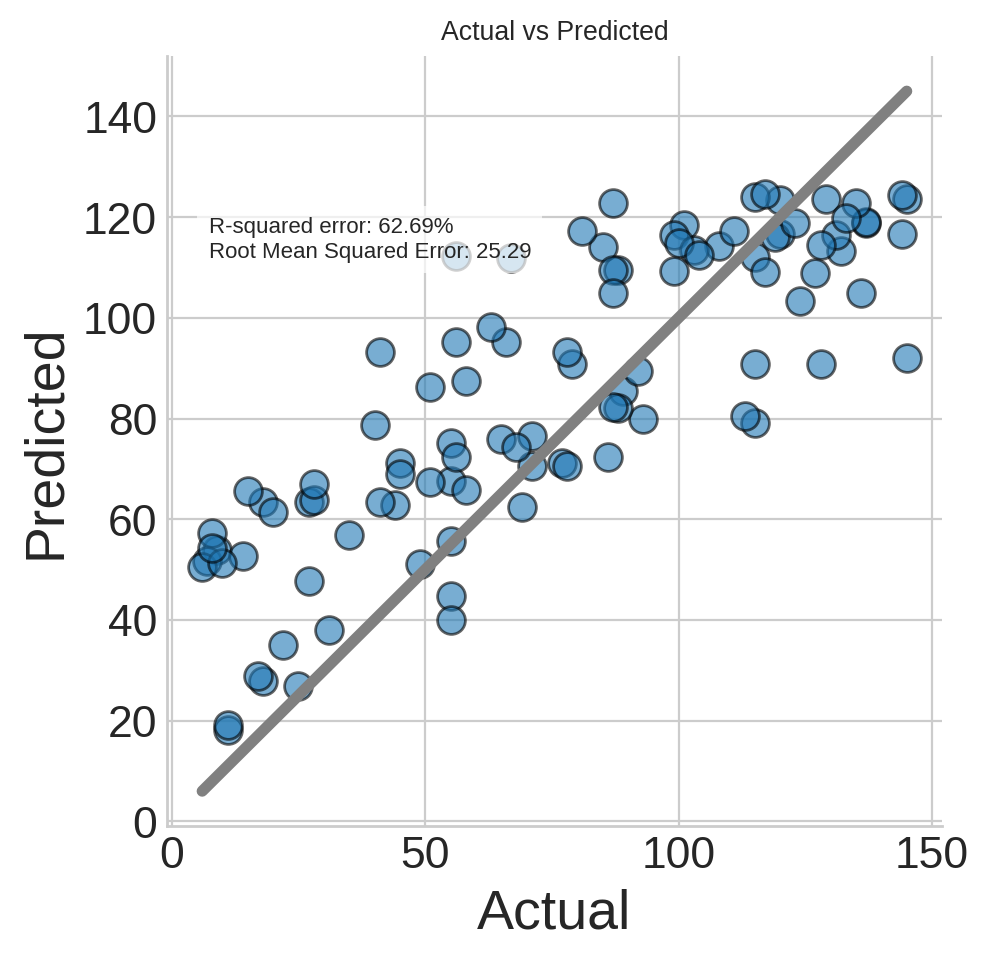

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize']=5,5

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_predictions_rf,
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray',
             ax=ax)

rmse = np.sqrt(mean_squared_error(y_test, y_predictions_rf))
x_pos = 0.05 * max(y_test)
y_pos = 0.9 * max(y_predictions_rf)

plt.annotate(
    text=(
        'R-squared error: ' + "{:.2%}".format(model.score(X_test, y_test)) + '\n' +
        'Root Mean Squared Error: ' + "{:.2f}".format(rmse)
    ),
    xy=(x_pos, y_pos),
    size='medium',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # optional for readability
)

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

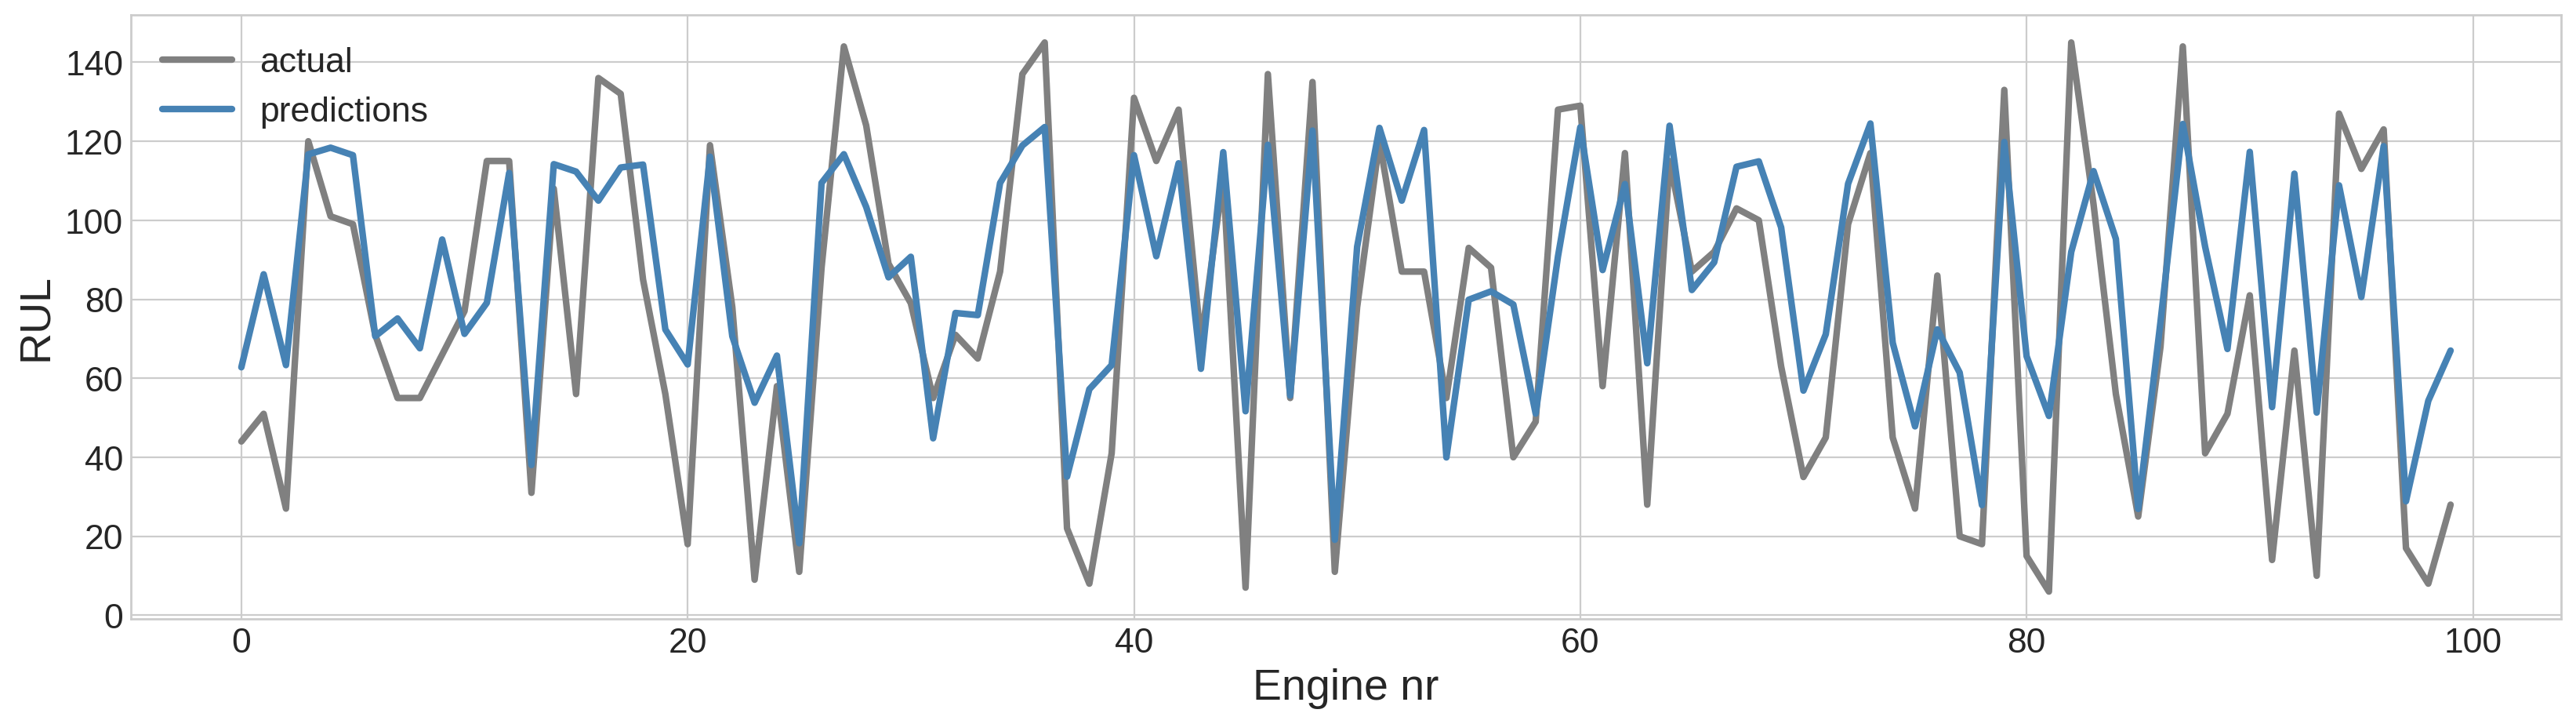

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize']=20,5

fig,ax = plt.subplots()
plt.ylabel('RUL')
plt.xlabel('Engine nr')

g = sns.lineplot(x = np.arange(0,len(df_test['engine'].unique())),
                y=y_test,
                color='gray',
                label = 'actual',
                ax=ax)

f = sns.lineplot(x = np.arange(0,len(df_test['engine'].unique())),
                y=y_predictions_rf,
                color='steelblue',
                label = 'predictions',
                ax=ax)
ax.legend()

# ADABoost

In [ ]:
%%time
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import numpy as np

start = time.time()

# Define parameter distributions for random search
param_distributions = {
    'n_estimators': randint(50, 500),                    # Number of boosting stages
    'learning_rate': uniform(0.01, 1.99),                # Learning rate (0.01 to 2.0)
    'loss': ['linear', 'square', 'exponential'],         # Loss function
    'estimator__max_depth': randint(1, 10),         # Max depth of base estimator
    'estimator__min_samples_split': randint(2, 20), # Min samples to split
    'estimator__min_samples_leaf': randint(1, 10)   # Min samples at leaf
}

# Create base model with decision tree estimator
base_estimator = DecisionTreeRegressor(random_state=42)
adaboost = AdaBoostRegressor(estimator=base_estimator, random_state=42)

# RandomizedSearchCV - faster than GridSearchCV
random_search = RandomizedSearchCV(
    adaboost,
    param_distributions=param_distributions,
    n_iter=20,              # Number of parameter settings sampled
    cv=3,                   # 3-fold cross-validation (fast)
    scoring='r2',           # Optimize for R-squared
    n_jobs=-1,              # Use all CPU cores
    random_state=42,
    verbose=1
)

# Fit the random search
random_search.fit(X_train_clean, y_train_clean)

# Best model
model = random_search.best_estimator_
print(f"\nBest parameters: {random_search.best_params_}")
print(f"Best CV score: {random_search.best_score_:.4f}")

end_train = time.time()

# Predictions
y_predictions_adb = model.predict(X_test)
end_predict = time.time()

# Store performance
model_performance.loc['AdaBoost'] = [
    sklearn.metrics.r2_score(y_test, y_predictions_adb),
    np.sqrt(mean_squared_error(y_test, y_predictions_adb)),
    end_train - start,
    end_predict - end_train,
    end_predict - start
]

print('\nR-squared error: ' + "{:.2%}".format(sklearn.metrics.r2_score(y_test, y_predictions_adb)))
print('Root Mean Squared Error: ' + "{:.2f}".format(np.sqrt(mean_squared_error(y_test, y_predictions_adb))))

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best parameters: {'estimator__max_depth': 9, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 11, 'learning_rate': np.float64(0.10286466979509469), 'loss': 'exponential', 'n_estimators': 239}
Best CV score: 0.7184

R-squared error: 64.18%
Root Mean Squared Error: 24.77
CPU times: user 32.3 s, sys: 498 ms, total: 32.8 s
Wall time: 8min 55s


# XGBoost

In [ ]:
%%time
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import numpy as np

start = time.time()

# Define parameter distributions for random search
param_distributions = {
    'n_estimators': randint(100, 1000),              # Number of boosting rounds
    'max_depth': randint(3, 10),                     # Maximum tree depth
    'learning_rate': uniform(0.01, 0.29),            # Learning rate (0.01 to 0.3)
    'subsample': uniform(0.6, 0.4),                  # Subsample ratio (0.6 to 1.0)
    'colsample_bytree': uniform(0.6, 0.4),           # Feature sampling (0.6 to 1.0)
    'min_child_weight': randint(1, 10),              # Minimum sum of instance weight
    'gamma': uniform(0, 0.5),                        # Minimum loss reduction
    'reg_alpha': uniform(0, 1),                      # L1 regularization
    'reg_lambda': uniform(0, 1)                      # L2 regularization
}

# Create base model
xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1,
    tree_method='hist'  # Faster training
)

# RandomizedSearchCV - faster than GridSearchCV
random_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_distributions,
    n_iter=25,              # Number of parameter settings sampled
    cv=3,                   # 3-fold cross-validation (fast)
    scoring='r2',           # Optimize for R-squared
    n_jobs=-1,              # Use all CPU cores
    random_state=42,
    verbose=1
)

# Fit the random search
random_search.fit(X_train_clean, y_train_clean)

# Best model
model = random_search.best_estimator_
print(f"\nBest parameters: {random_search.best_params_}")
print(f"Best CV score: {random_search.best_score_:.4f}")

end_train = time.time()

# Predictions
y_predictions_xgb = model.predict(X_test)
end_predict = time.time()

# Store performance
model_performance.loc['XGBoost'] = [
    model.score(X_test, y_test),
    np.sqrt(mean_squared_error(y_test, y_predictions_xgb)),
    end_train - start,
    end_predict - end_train,
    end_predict - start
]

print('\nR-squared error: ' + "{:.2%}".format(model.score(X_test, y_test)))
print('Root Mean Squared Error: ' + "{:.2f}".format(np.sqrt(mean_squared_error(y_test, y_predictions_xgb))))

Fitting 3 folds for each of 25 candidates, totalling 75 fits

Best parameters: {'colsample_bytree': np.float64(0.908897907718663), 'gamma': np.float64(0.0993578407670862), 'learning_rate': np.float64(0.011601413965844696), 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 692, 'reg_alpha': np.float64(0.71134195274865), 'reg_lambda': np.float64(0.7901755405312056), 'subsample': np.float64(0.8423839899124046)}
Best CV score: 0.7322

R-squared error: 70.98%
Root Mean Squared Error: 22.30
CPU times: user 3.04 s, sys: 142 ms, total: 3.18 s
Wall time: 1min 44s


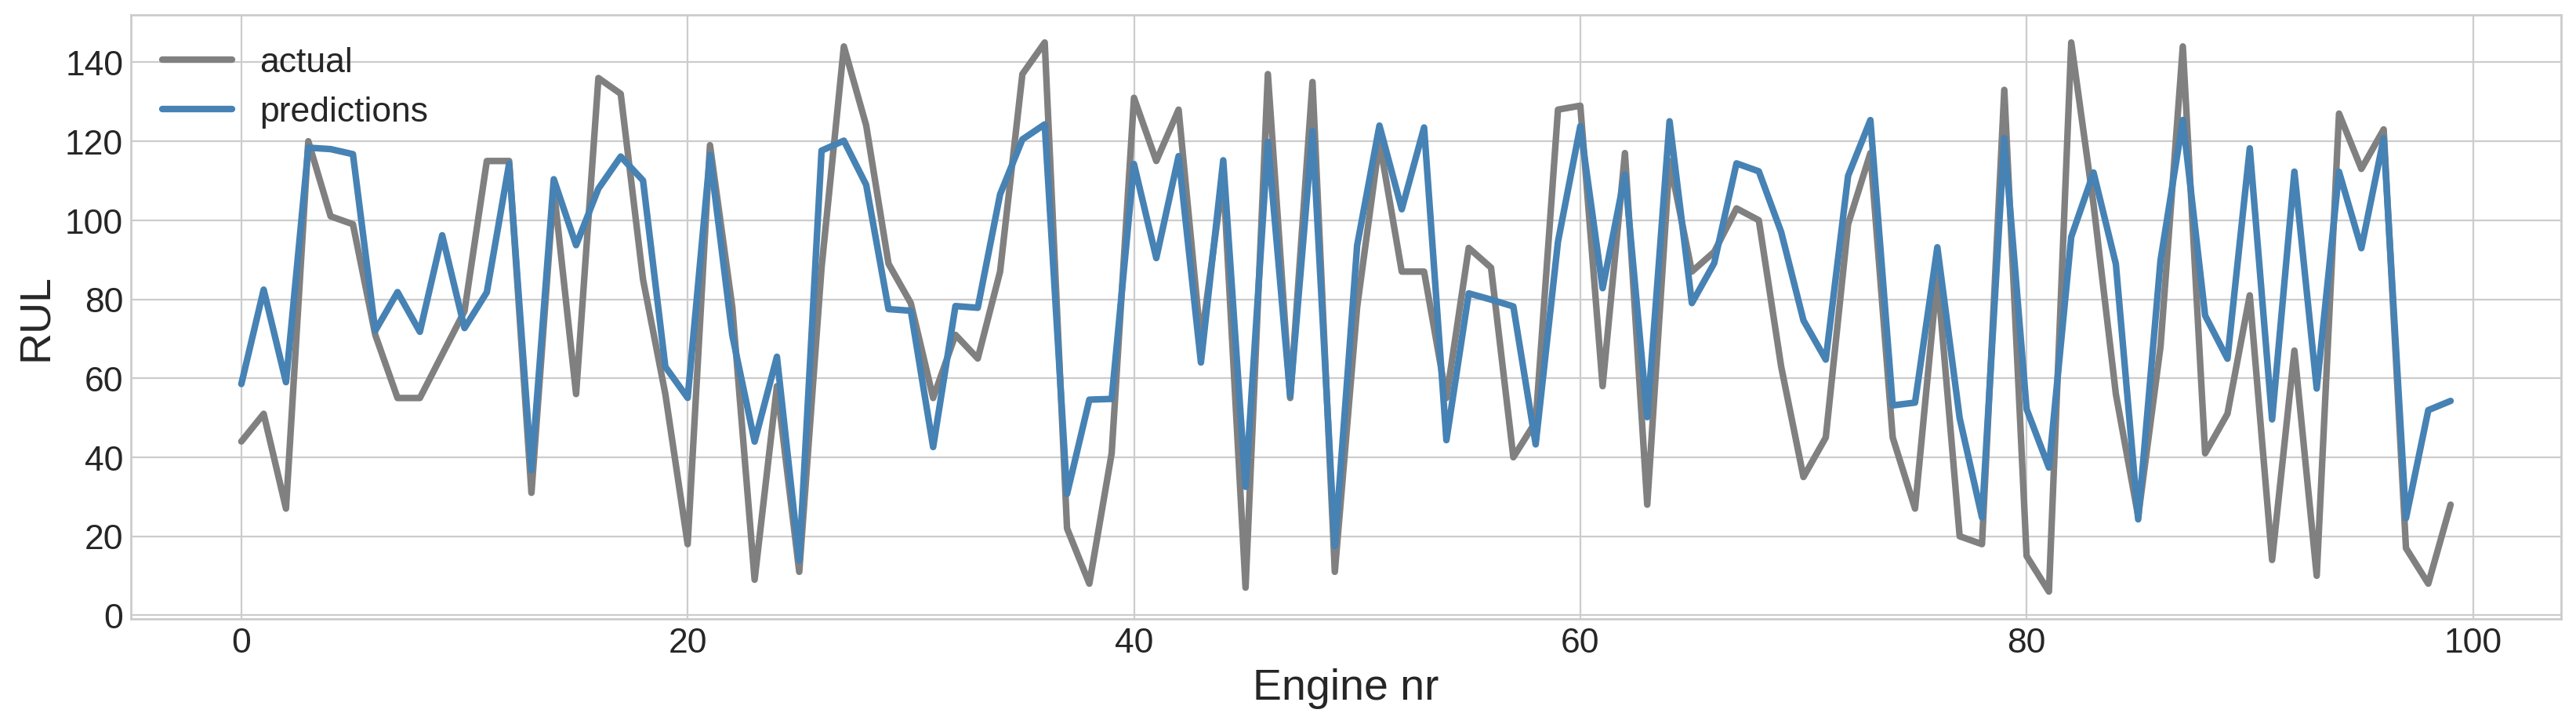

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize']=20,5

fig,ax = plt.subplots()
plt.ylabel('RUL')
plt.xlabel('Engine nr')

g = sns.lineplot(x = np.arange(0,len(df_test['engine'].unique())),
                y=y_test,
                color='gray',
                label = 'actual',
                ax=ax)

f = sns.lineplot(x = np.arange(0,len(df_test['engine'].unique())),
                y=y_predictions_xgb,
                color='steelblue',
                label = 'predictions',
                ax=ax)
ax.legend()

In [ ]:
# Convert to numpy if needed
y_true = y_test.values

# sort indices by true RUL
sort_idx = np.argsort(y_true)

# sorted true RUL
y_true_sorted = y_true[sort_idx]

# sorted predictions (EXAMPLE names – adjust if needed)
xgb_sorted   = y_predictions_xgb[sort_idx]
lstm_sorted  = y_predictions_lstm2[sort_idx]
rf_sorted    = y_predictions_rf[sort_idx]
svr_sorted   = y_predictions_svr[sort_idx]
knn_sorted   = y_predictions_knn[sort_idx]
ada_sorted   = y_predictions_adb[sort_idx]

# x-axis like paper
unit_id = np.arange(1, len(y_true_sorted) + 1)


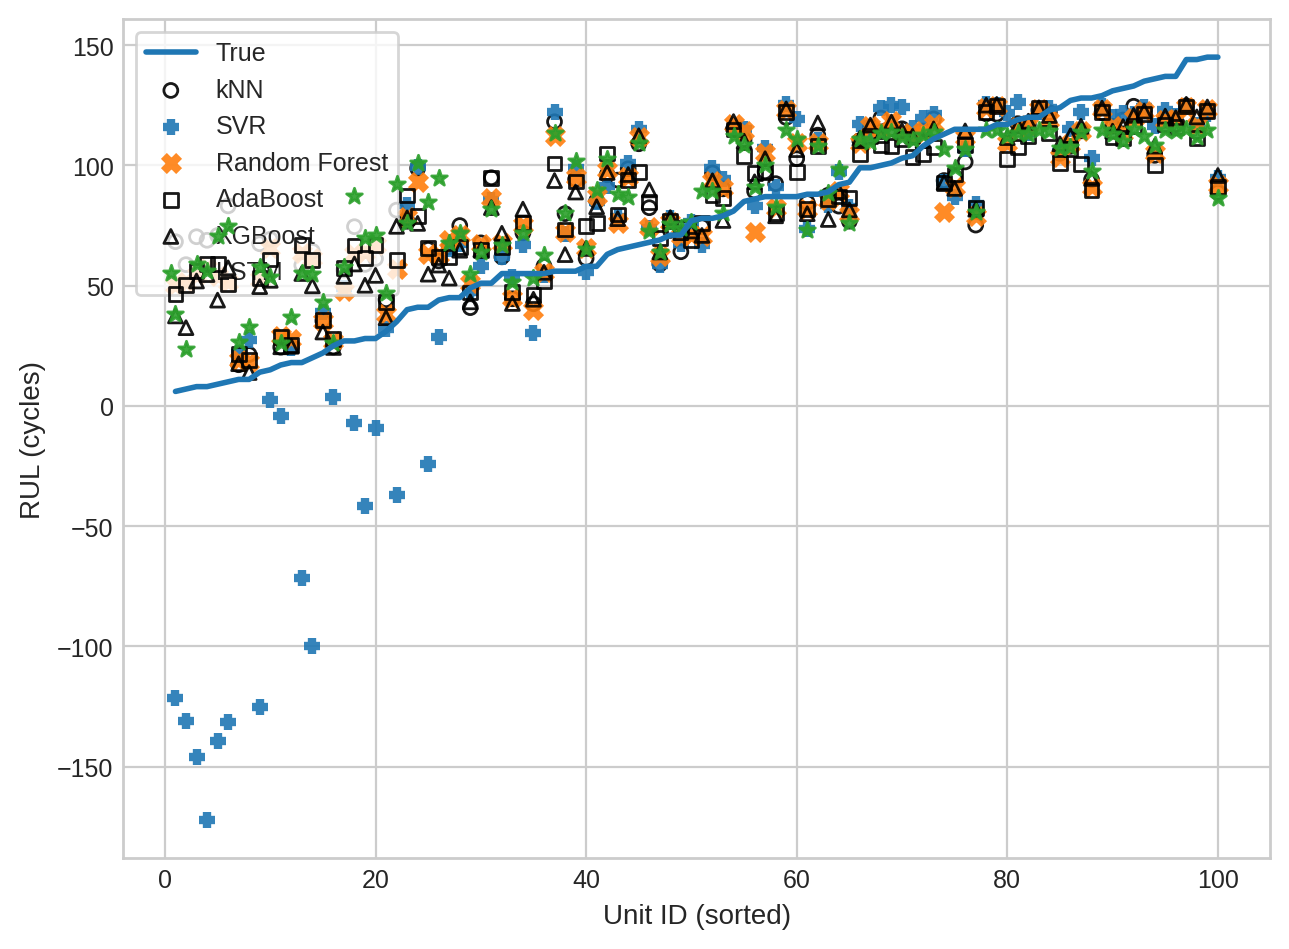

In [ ]:
plt.figure(figsize=(6.5, 4.8))

# ---- TRUE RUL (top layer) ----
plt.plot(unit_id, y_true_sorted,
         linewidth=2,
         label='True',
         zorder=10)

# ---- MODELS (controlled layering) ----
plt.scatter(unit_id, knn_sorted,
            marker='o', facecolors='none',
            edgecolors='black',
            s=25, alpha=0.9,
            label='kNN', zorder=3)

plt.scatter(unit_id, svr_sorted,
            marker='+',
            s=30, alpha=0.9,
            label='SVR', zorder=4)

plt.scatter(unit_id, rf_sorted,
            marker='x',
            s=30, alpha=0.9,
            label='Random Forest', zorder=5)

plt.scatter(unit_id, ada_sorted,
            marker='s', facecolors='none',
            edgecolors='black',
            s=25, alpha=0.9,
            label='AdaBoost', zorder=6)

plt.scatter(unit_id, xgb_sorted,
            marker='^', facecolors='none',
            edgecolors='black',
            s=25, alpha=0.9,
            label='XGBoost', zorder=7)

plt.scatter(unit_id, lstm_sorted,
            marker='*',
            s=35, alpha=0.9,
            label='LSTM', zorder=8)

# ---- AXES & LEGEND ----
plt.xlabel('Unit ID (sorted)', fontsize=10)
plt.ylabel('RUL (cycles)', fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.legend(loc='upper left', fontsize=9, frameon=True)
plt.tight_layout()
plt.show()


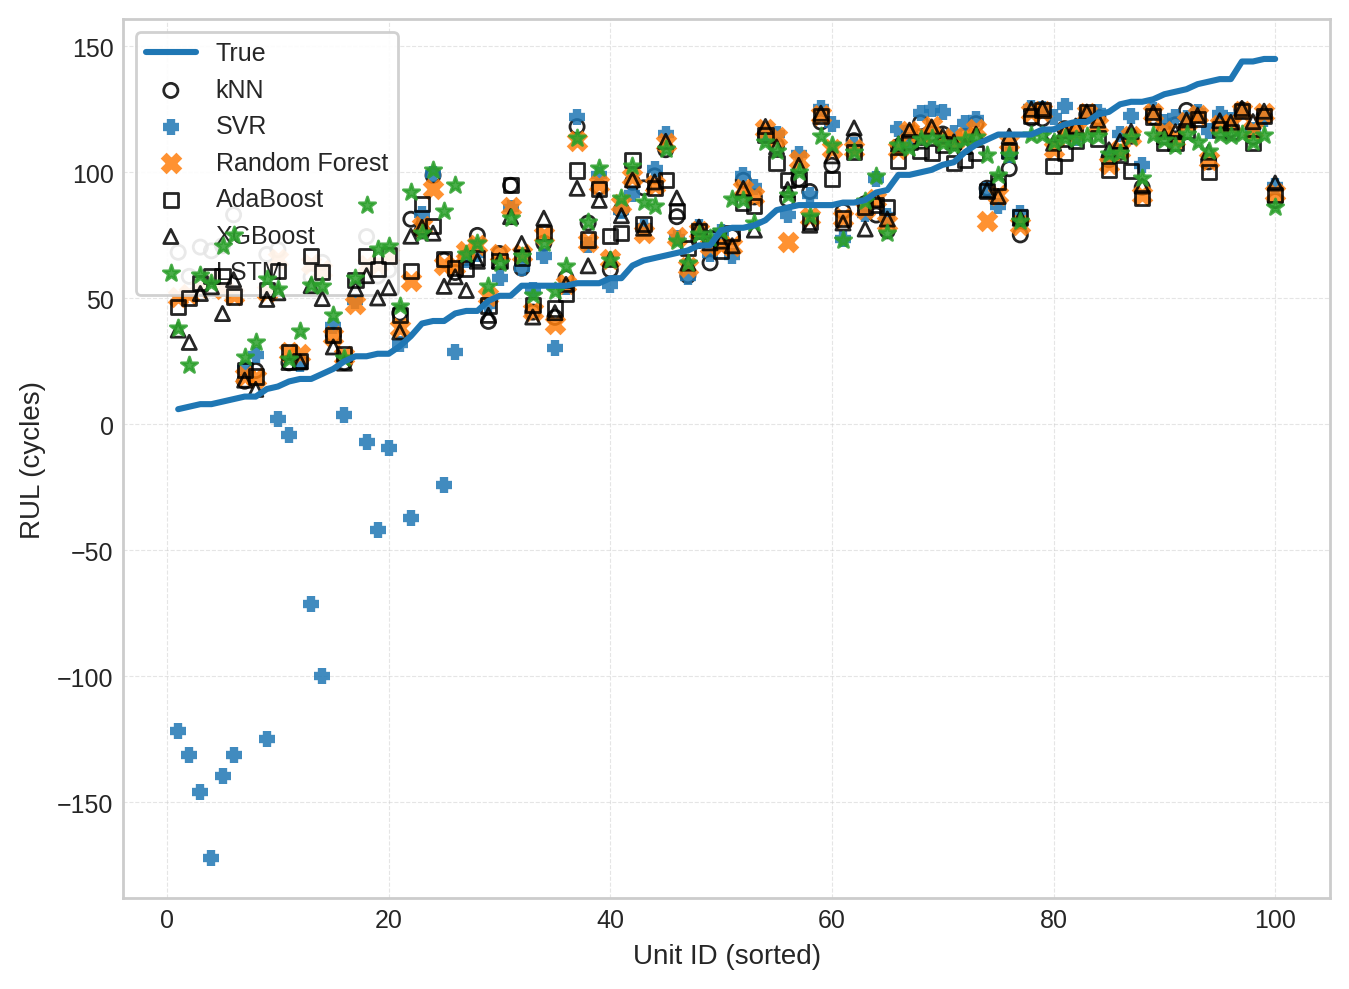

In [ ]:
plt.figure(figsize=(6.8, 5))

# ---- TRUE RUL (slightly smoother & emphasized) ----
plt.plot(
    unit_id, y_true_sorted,
    linewidth=2.2,
    color='tab:blue',
    label='True',
    zorder=10
)

# ---- MODEL SCATTERS ----
plt.scatter(unit_id, knn_sorted,
            marker='o', facecolors='none',
            edgecolors='black',
            s=26, alpha=0.85,
            label='kNN', zorder=3)

plt.scatter(unit_id, svr_sorted,
            marker='+',
            s=34, alpha=0.85,
            label='SVR', zorder=4)

plt.scatter(unit_id, rf_sorted,
            marker='x',
            s=32, alpha=0.85,
            label='Random Forest', zorder=5)

plt.scatter(unit_id, ada_sorted,
            marker='s', facecolors='none',
            edgecolors='black',
            s=26, alpha=0.85,
            label='AdaBoost', zorder=6)

plt.scatter(unit_id, xgb_sorted,
            marker='^', facecolors='none',
            edgecolors='black',
            s=26, alpha=0.85,
            label='XGBoost', zorder=7)

plt.scatter(unit_id, lstm_sorted,
            marker='*',
            s=38, alpha=0.85,
            label='LSTM', zorder=8)

# ---- AXES ----
plt.xlabel('Unit ID (sorted)', fontsize=10)
plt.ylabel('RUL (cycles)', fontsize=10)

plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

# ---- GRID (soft, elegant) ----
plt.grid(True, linestyle='--', linewidth=0.4, alpha=0.5)

# ---- LEGEND (clean paper look) ----
plt.legend(
    loc='upper left',
    fontsize=9,
    frameon=True,
    fancybox=True,
    framealpha=0.9
)

plt.tight_layout()
plt.show()


In [ ]:
model_performance.style.background_gradient(cmap='RdYlBu_r').format({'R2': '{:.2%}',
                                                                     'RMSE': '{:.2f}',
                                                                     'time to train':'{:.3f}',
                                                                     'time to predict':'{:.3f}',
                                                                     'total time':'{:.3f}',
                                                                     })

# Best Model

XGBoost